# BUSINESS ECONOMIC AND FINANCIAL DATA <br> Nvidia Share Price Analysis and Forcasting

### Group Members: 
#### Nadillia Sahputra  <br> Stefano Meza <br> Qiqi Zhang

In [1]:
# install.packages("anytime")
# install.packages("corrplot")
# install.packages("gam")

In [1]:
library(readxl)
library(DIMORA)
library(ggplot2)
library(tidyverse)
library(anytime)
library(dplyr)
library(lubridate)
library(lmtest) 
library(forecast)
library(corrplot)
library(gam)

Loading required package: minpack.lm

Loading required package: numDeriv

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: reshape2

Loading required package: deSolve

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


corrplot 0.92 loaded

Loading required package: splines

Loading required 

In [2]:
options(repr.plot.width=15, repr.plot.height=8)

## Data of Nvidia Share Price

In [3]:
#read the data we need to explain and forcast: Nvidia share price
# Read the data
nvidia<- read_excel('nvidia.xlsx', sheet=2)
head(nvidia)

New names:
• `` -> `...2`


NVIDIA monthly share price on the Nasdaq stock exchange 2010-2023,...2
<chr>,<dbl>
Monthly share price of NVIDIA on the Nasdaq stock exchange from January 2010 to August 2023 (in U.S. dollars),NA
NA,NA
Jan 2010,3.85
Feb 2010,4.05
Mar 2010,4.35
Apr 2010,3.93


In [4]:
nvidia <- nvidia[-c(1:2),]
head(nvidia)

NVIDIA monthly share price on the Nasdaq stock exchange 2010-2023,...2
<chr>,<dbl>
Jan 2010,3.85
Feb 2010,4.05
Mar 2010,4.35
Apr 2010,3.93
May 2010,3.29
Jun 2010,2.55


In [5]:
colnames(nvidia) <- c("Date", "Share_Price")
head(nvidia)

Date,Share_Price
<chr>,<dbl>
Jan 2010,3.85
Feb 2010,4.05
Mar 2010,4.35
Apr 2010,3.93
May 2010,3.29
Jun 2010,2.55


In [6]:
# Convert column year to numeric type
nvidia$Date <- as.Date(paste(nvidia$Date, "1"), format="%b %Y %d")

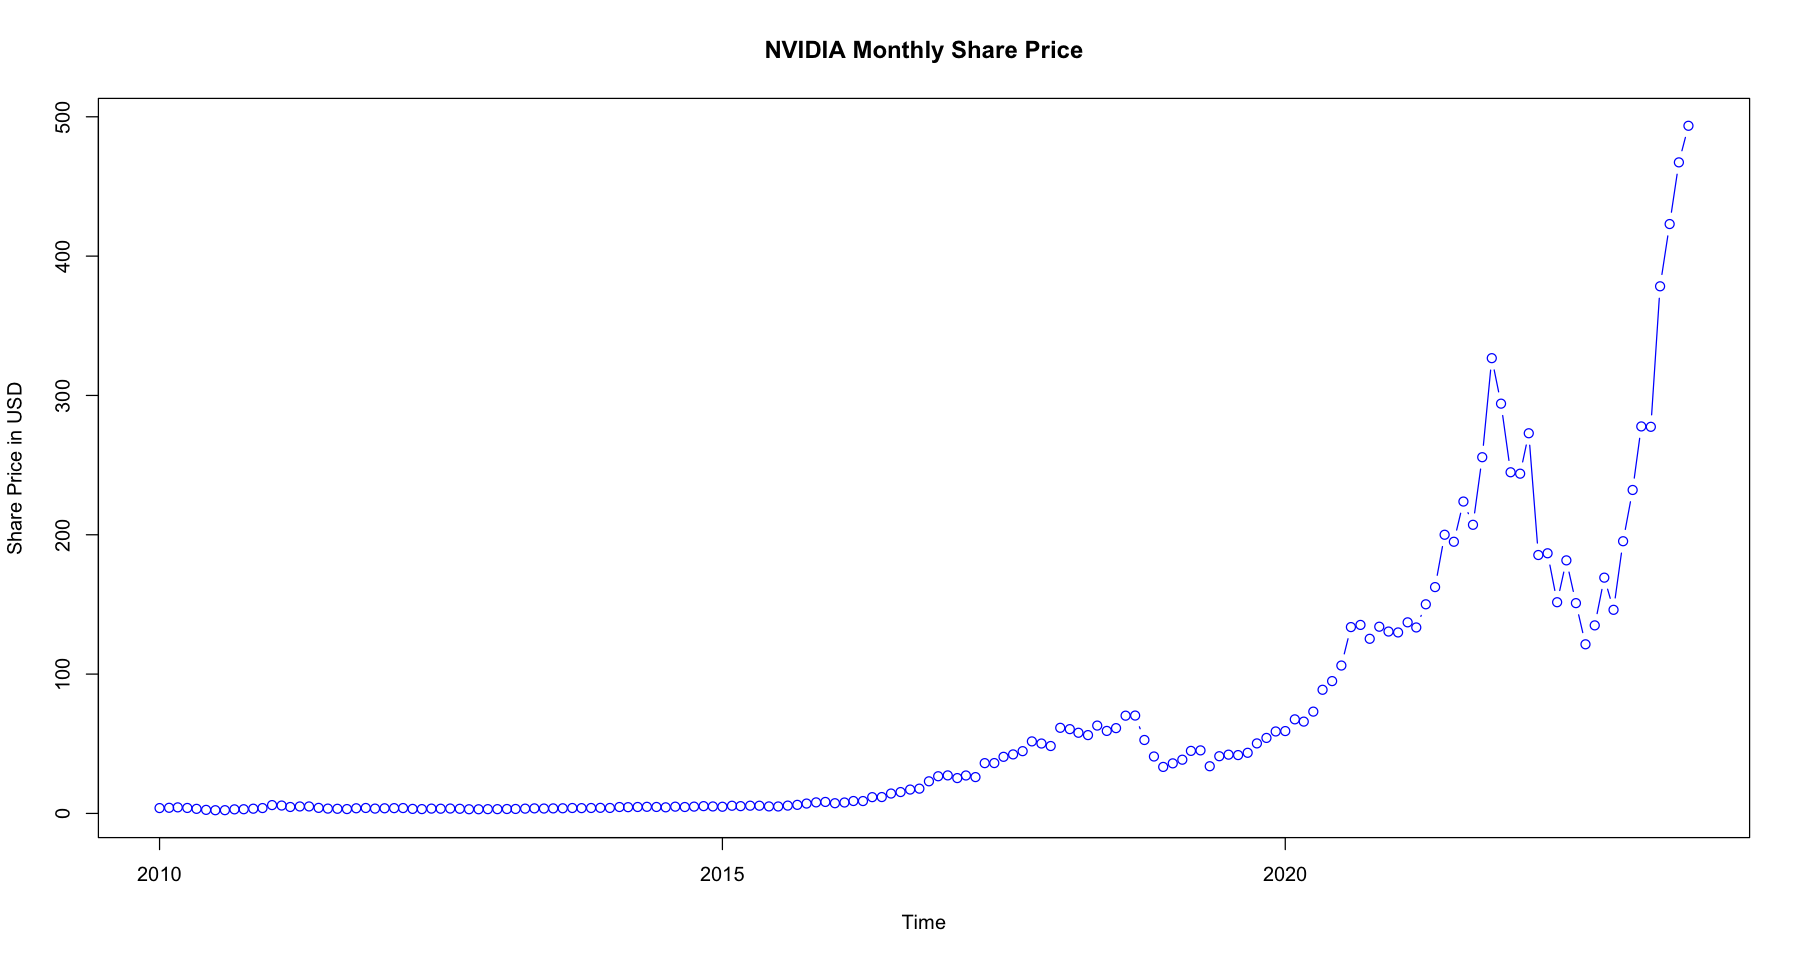

In [7]:
plot(nvidia$Date, nvidia$Share_Price ,type="b", col="blue", xlab="Time", ylab="Share Price in USD",
     main="NVIDIA Monthly Share Price")

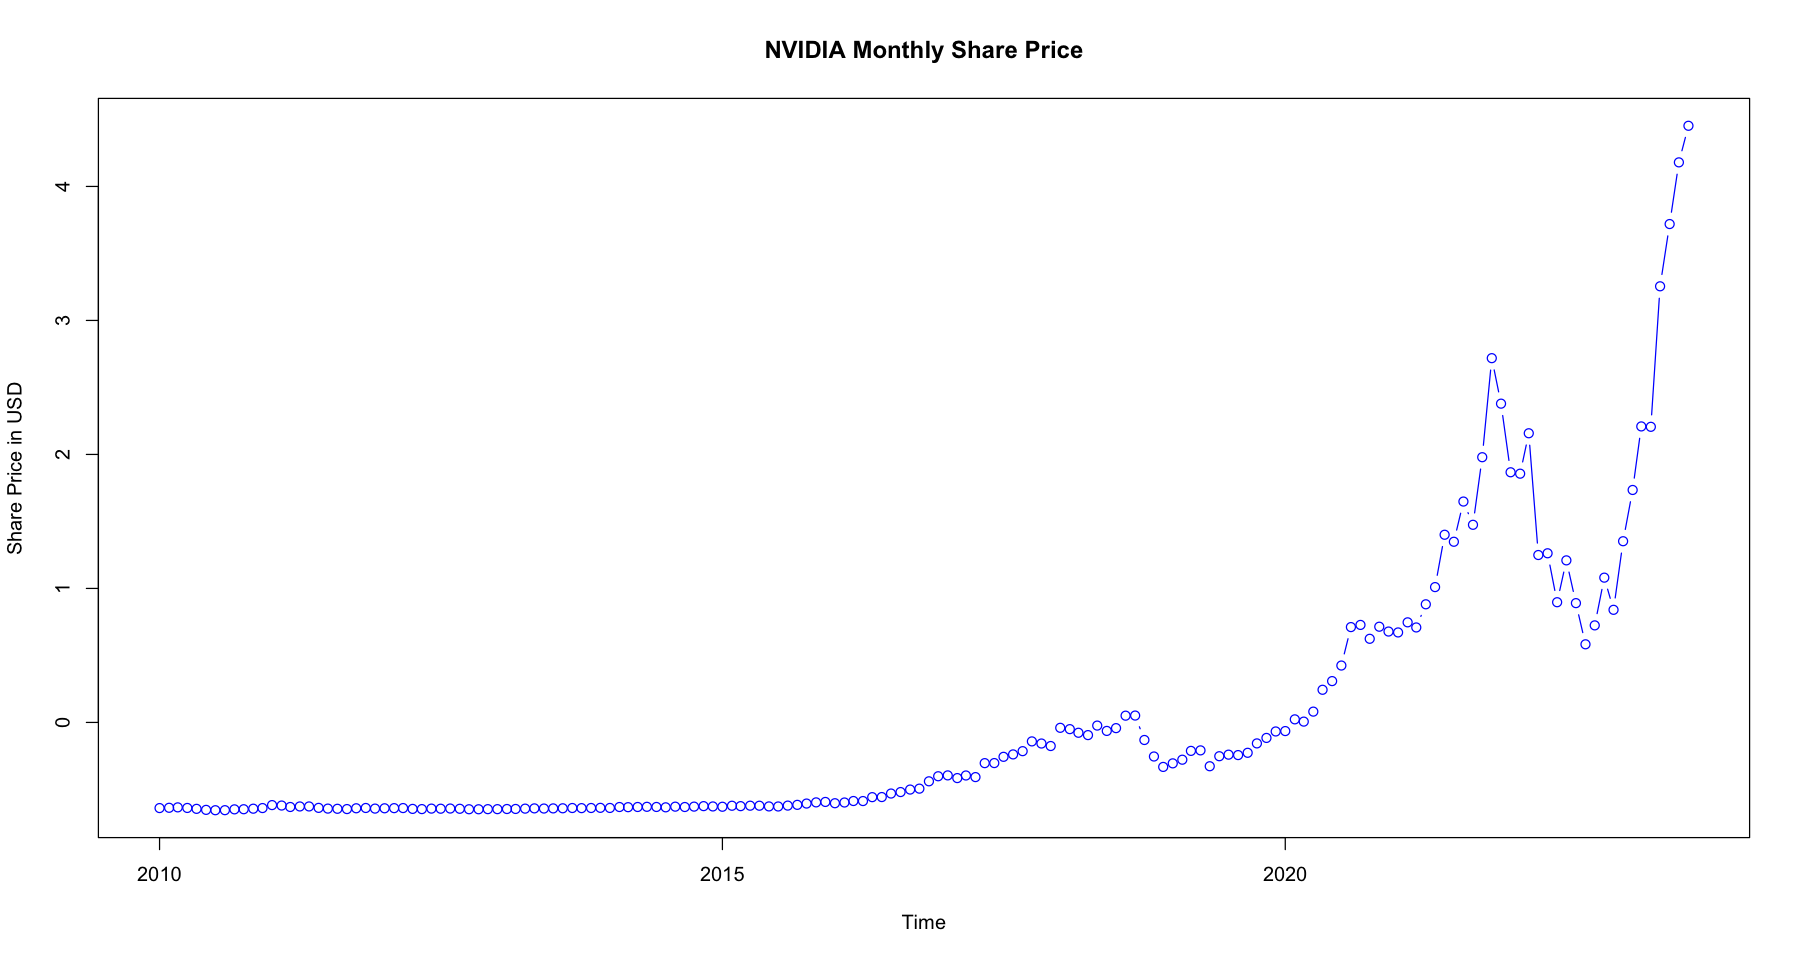

In [8]:
### Scaling the data for future model fitting
scaled <- scale(nvidia$Share_Price)
plot(nvidia$Date, scaled ,type="b", col="blue", xlab="Time", ylab="Share Price in USD",
     main="NVIDIA Monthly Share Price")

## Data of Explanatory Variables

### 1. The price of bitcoin

In [9]:
# load the dataset of explanatory variable 1: the price of bitcoin
bitcoin <- data.frame(read_excel('bitcoin.xlsx'))
colnames(bitcoin)[1] <- "Date"
colnames(bitcoin)[2] <- "Price"
head(bitcoin)

,Date,Price
,<chr>,<dbl>
1,Apr 2013,135.30
2,May 2013,127.98
3,Jun 2013,95.39
4,Jul 2013,110.34
5,Aug 2013,137.76
6,Sep 2013,131.65


In [10]:
# Convert column year to numeric type
bitcoin$Date <- as.Date(paste(bitcoin$Date, "1"), format="%b %Y %d")

In [11]:
head(bitcoin)

,Date,Price
,<date>,<dbl>
1,2013-04-01,135.30
2,2013-05-01,127.98
3,2013-06-01,95.39
4,2013-07-01,110.34
5,2013-08-01,137.76
6,2013-09-01,131.65


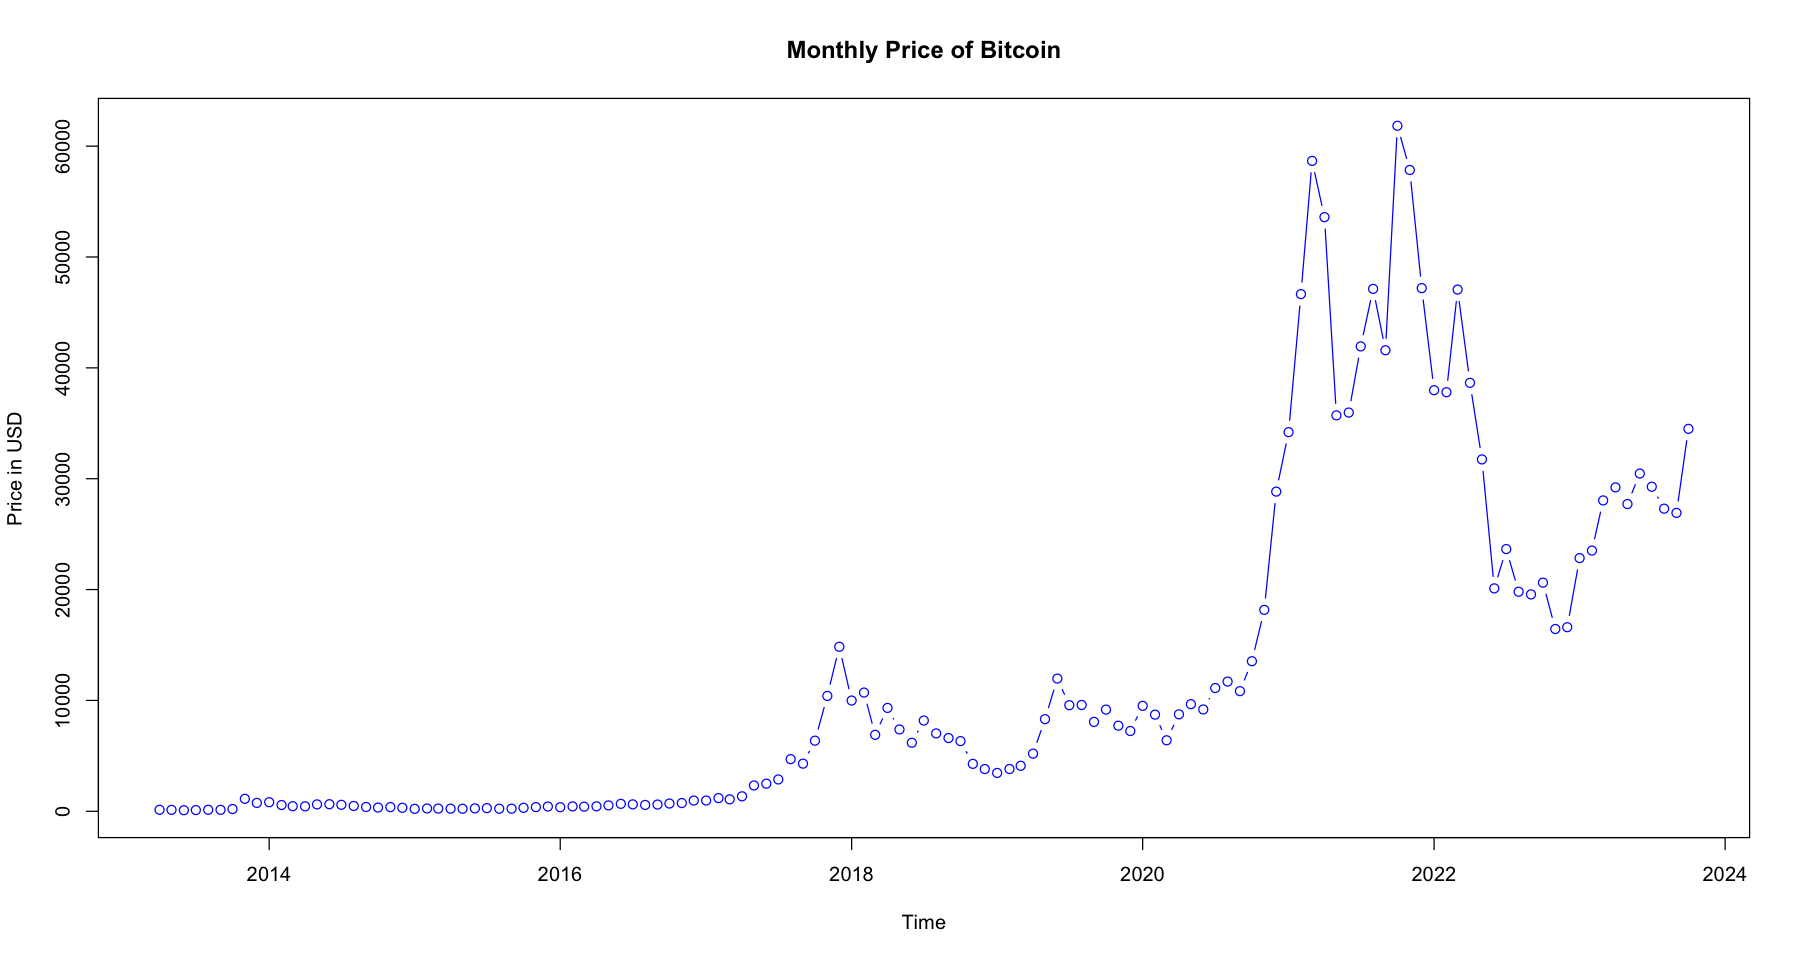

In [12]:

# plot the dataset
plot(bitcoin$Date, bitcoin$Price ,type="b", col="blue", xlab="Time", ylab="Price in USD",
     main="Monthly Price of Bitcoin")

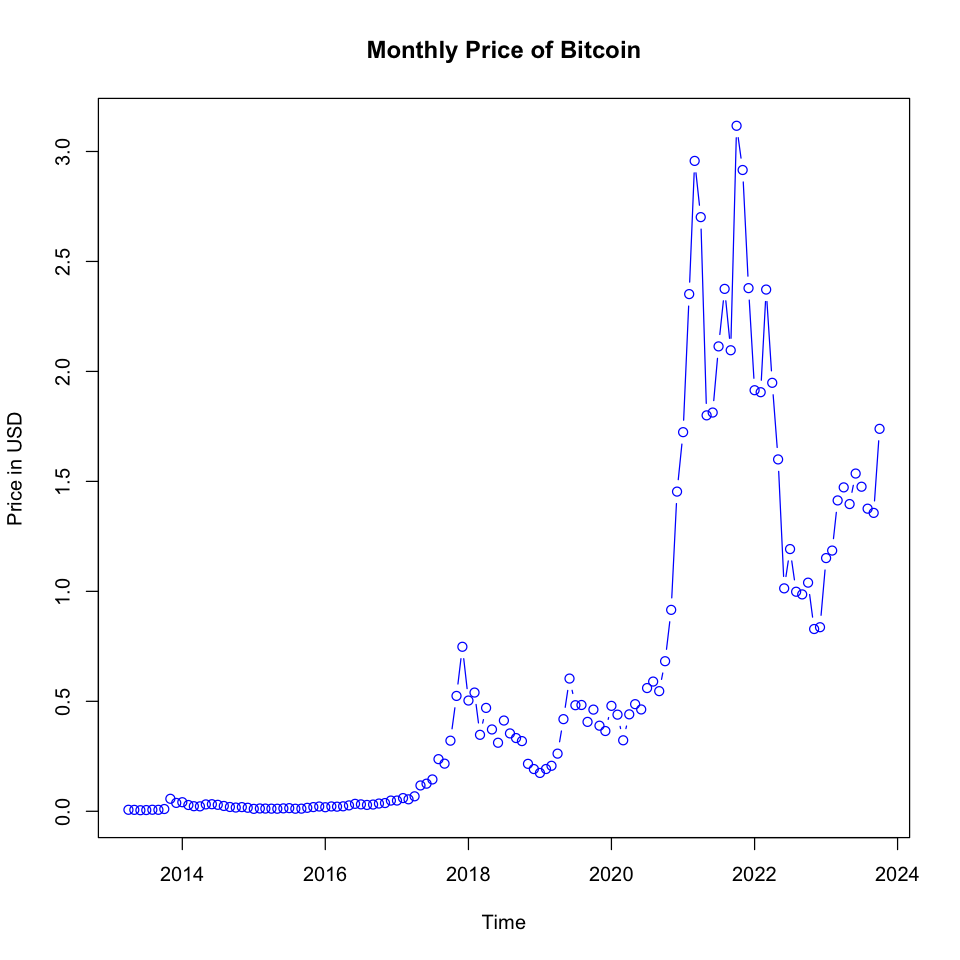

In [20]:
# plot the scaled dataset
plot(bitcoin$Date, scale(bitcoin$Price, center = FALSE) ,type="b", col="blue", xlab="Time", ylab="Price in USD",
     main="Monthly Price of Bitcoin")

### 2. The Revenue of Video Games (Hardware) in USA

In [13]:
# Load the dataset of explanatory variable 2: revenue of video games
vidgame <- read_excel('vidgame.xlsx')
head(vidgame)

Time,Total,Game Content,Hardware,Accessories,Software
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mar '10,1.52,NA,0.44,0.21,0.88
Apr '10,0.77,NA,0.25,0.12,0.40
May '10,0.82,NA,0.24,0.12,0.47
Jun '10,1.10,NA,0.40,0.17,0.53
Jul '10,0.85,NA,0.31,0.13,0.40
Aug '10,0.82,NA,0.28,0.13,0.40


In [14]:
vidgame <- vidgame %>%
  rename(Date = Time)

In [15]:
convertDate <- function(date) {
  # Split the string, replace ' with 20, and format to '01-month-year'
  formattedDate <- sub("(.*) '(.*)", "01-\\1-20\\2", date)
  # Convert abbreviated month to full month name
  formattedDate <- sub("^01-(...)-", "\\1-01-", formattedDate)
  # Convert to date format
  as.Date(formattedDate, format = "%b-%d-%Y")
}

# Apply the function to the Time column
vidgame$Date <- as.Date(sapply(vidgame$Date, convertDate), origin = "1970-01-01")

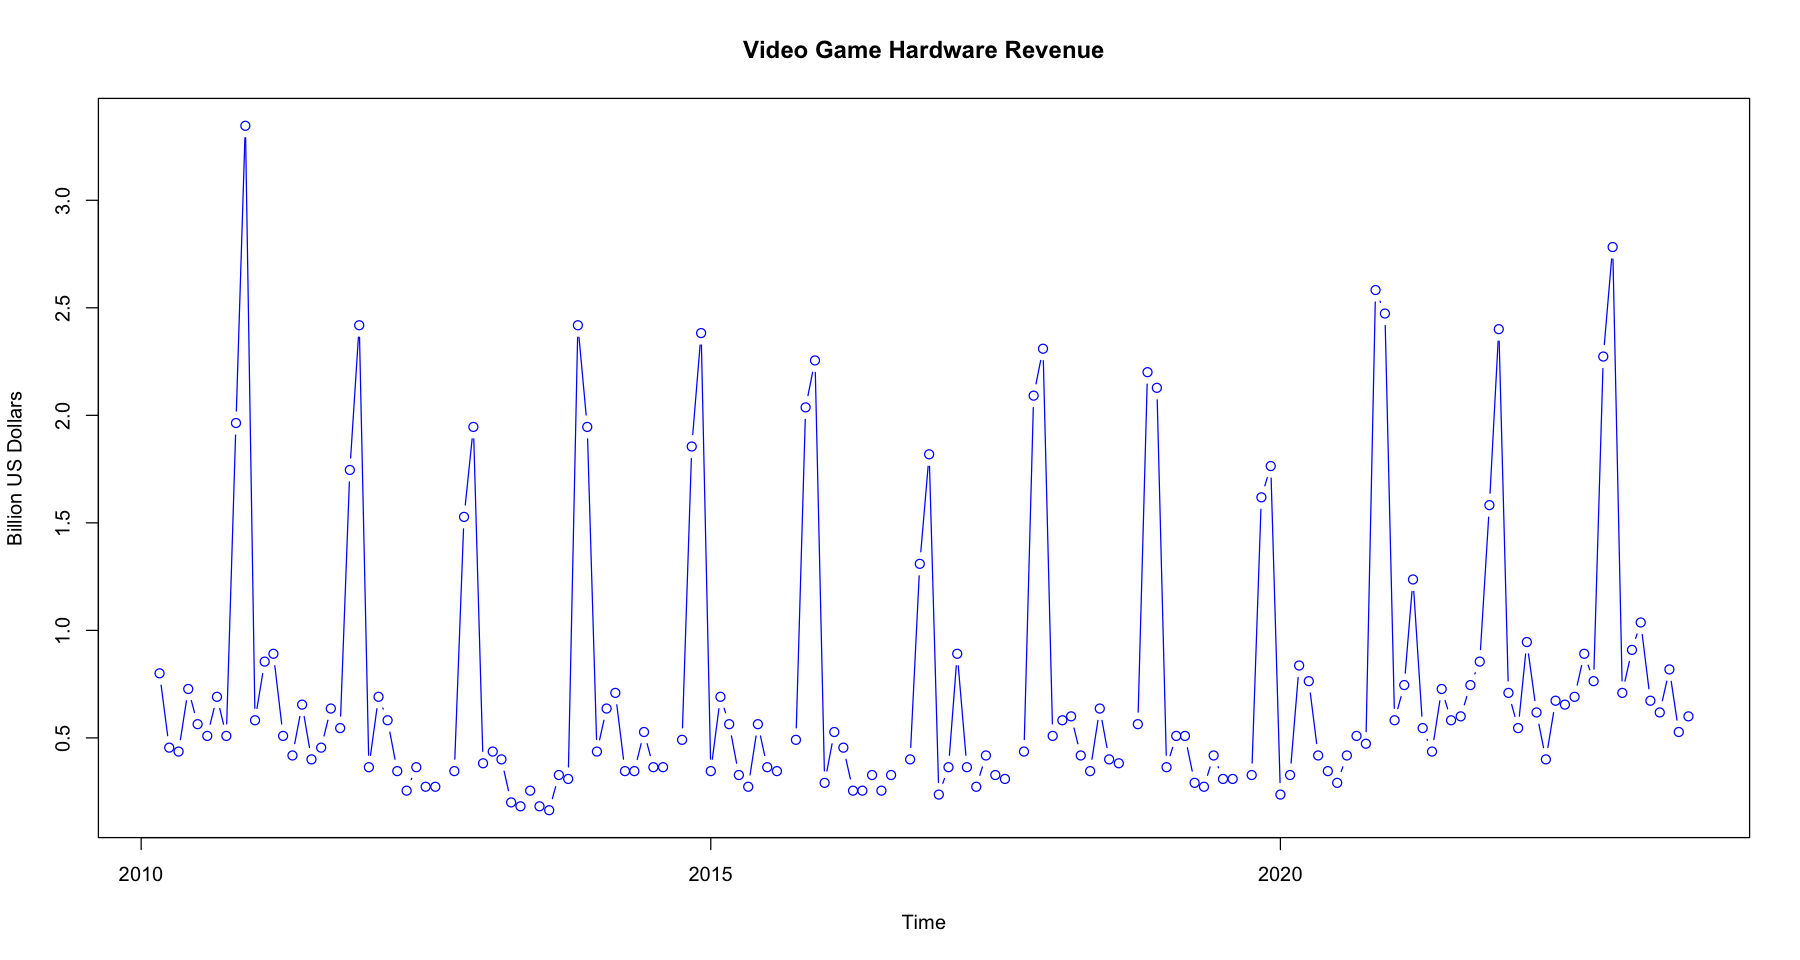

In [16]:
plot(vidgame$Date , scale(vidgame$Hardware,center = FALSE) ,type="b", col="blue", xlab="Time", ylab="Billion US Dollars", main="Video Game Hardware Revenue")

### 3. The Effect of COVID

In [17]:
# Load the dataset of explanatory variable 4: covid cases
covid <- read_excel('covid.xlsx')
head(covid)

Date,Cases
<chr>,<dbl>
1/22/20,460
1/23/20,591
1/24/20,866
1/25/20,1339
1/26/20,2036
1/27/20,2826


In [18]:
covid$Date <- as.Date(covid$Date, format="%m/%d/%y")

In [19]:
# covid$Monthly <- format(covid$Date, "%y-%m")

# Group By the month and take the first entry
covid_monthly <- covid %>%
  arrange(Date) %>%
  group_by(Year_Month = format(Date, "%Y-%m")) %>%
  slice(1) %>%
  ungroup()

covid_monthly <- covid_monthly %>% select(-last_col())

head(covid_monthly)

Date,Cases
<date>,<dbl>
2020-01-22,460
2020-02-01,11966
2020-03-01,86443
2020-04-01,889805
2020-05-01,3215563
2020-06-01,6150989


In [20]:
covid_monthly_ins <- covid_monthly %>%
  mutate(Inst = c(Cases[1], diff(Cases)))

head(covid_monthly_ins)

Date,Cases,Inst
<date>,<dbl>,<dbl>
2020-01-22,460,460
2020-02-01,11966,11506
2020-03-01,86443,74477
2020-04-01,889805,803362
2020-05-01,3215563,2325758
2020-06-01,6150989,2935426


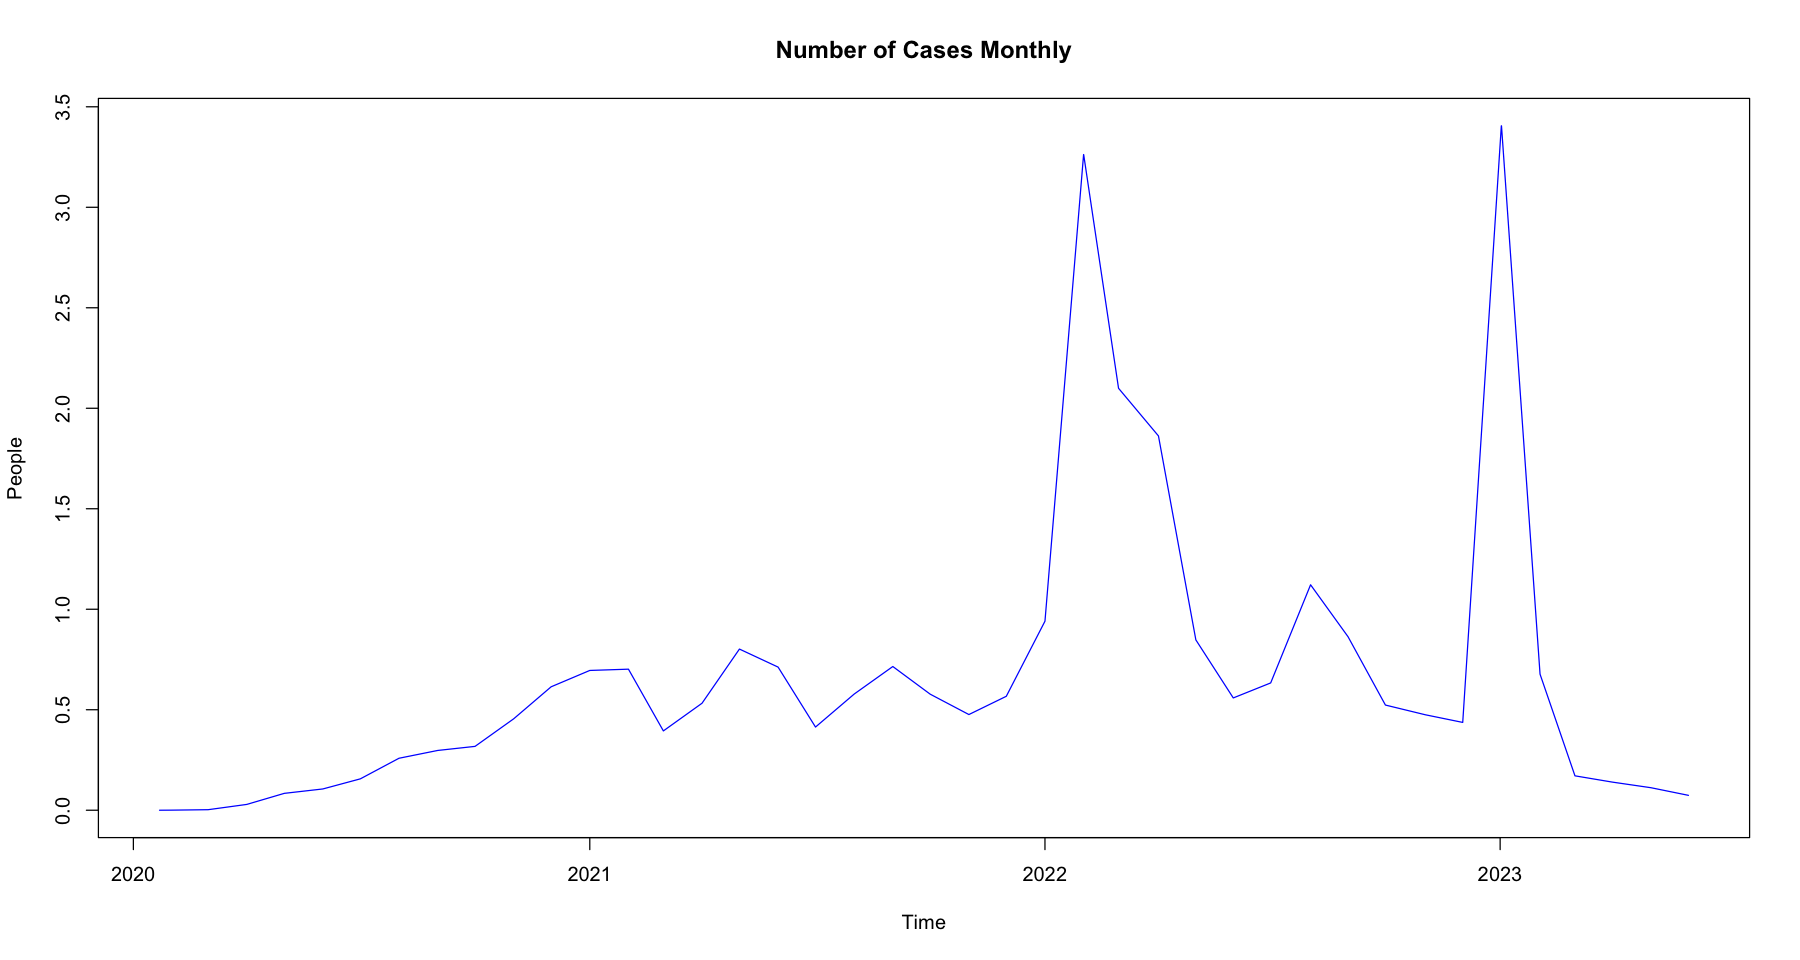

In [21]:
plot(covid_monthly_ins$Date, scale(covid_monthly_ins$Inst, center = FALSE) ,type="l", col="blue", xlab="Time", ylab="People", main="Number of Cases Monthly")

### 4. The Share Price of Upstream Companies (ASML and TSMC)

In [22]:
# Load the dataset of explanatory variable 5: share price of upsteam companies
# Read the data
ASML <- read.csv('ASML.csv', ,sep=',')
TSMC <- read.csv('TSMC.csv', ,sep=',')

# Convert column year to numeric type
ASML$Date <- as.Date(ASML$Date, format="%Y-%m-%d")
TSMC$Date <- as.Date(TSMC$Date, format="%Y-%m-%d")
head(ASML)
head(TSMC)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2010-01-01,34.79,35.39,30.99,31.25,21.64774,57909800
2,2010-02-01,31.58,32.92,29.81,30.83,21.35680,43431800
3,2010-03-01,30.93,35.88,30.93,35.40,24.52257,50626500
4,2010-04-01,36.03,36.34,32.59,32.66,22.80823,46061000
5,2010-05-01,32.71,33.47,26.67,28.26,19.73547,69587000
6,2010-06-01,28.25,31.41,26.99,27.47,19.18377,55381500


,Date,Open,High,Low,Close,Adj.Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2019-11-01,25.81875,28.00000,25.81875,28.00000,25.68248,2400
2,2019-12-01,28.00000,30.32625,27.90000,29.70375,27.24521,543200
3,2020-01-01,29.70375,30.84625,29.28625,29.66250,27.40769,120000
4,2020-02-01,29.26000,32.32500,29.26000,30.31875,28.01406,60240
5,2020-03-01,31.08750,32.34375,28.37750,30.59250,28.26700,160000
6,2020-04-01,30.90000,38.10000,30.90000,36.54750,34.09630,76000


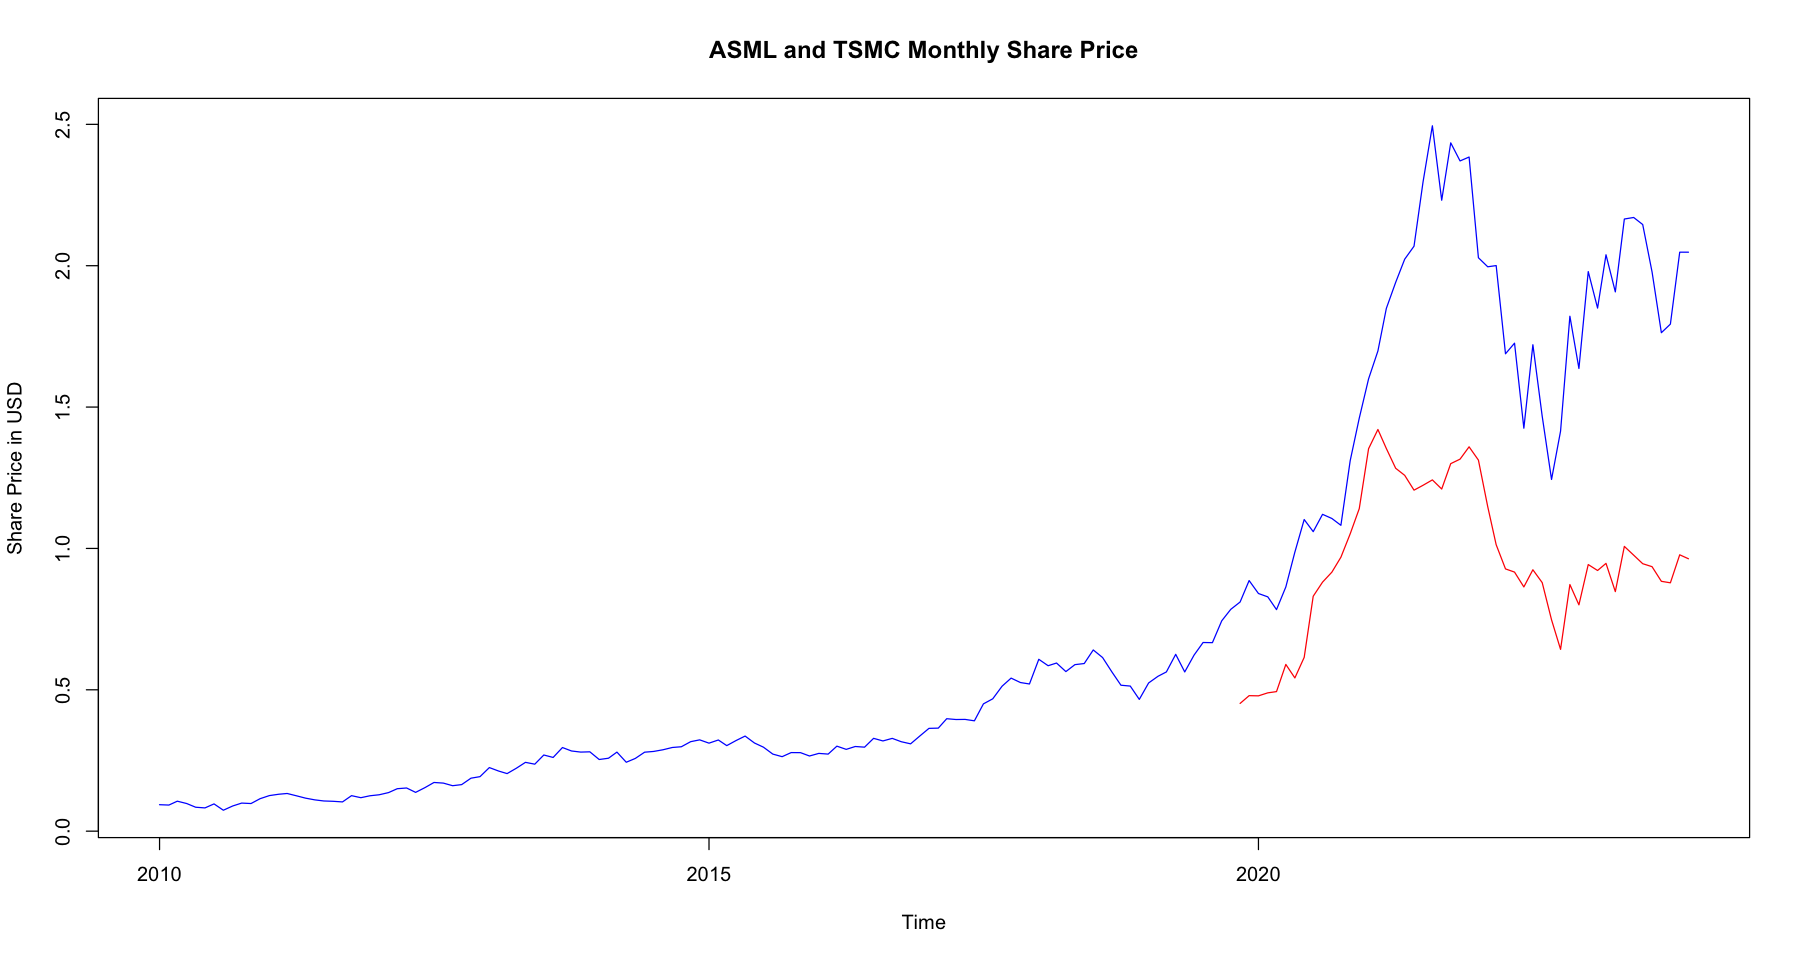

In [23]:
plot(ASML$Date, scale(ASML$Close, center = FALSE) ,type="l", col="blue", xlab="Time", ylab="Share Price in USD", main="ASML and TSMC Monthly Share Price")
lines(TSMC$Date, scale(TSMC$Close, center = FALSE) ,type="l", col="red")

### 5. The Share Price of Competition Company (AMD)

In [24]:
# Read the data
AMD <- read.csv('AMD.csv', ,sep=',')

# Convert column year to numeric type
AMD$Date <- as.Date(AMD$Date, format="%Y-%m-%d")
head(AMD)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2010-01-01,9.79,9.90,7.30,7.46,7.46,539405700
2,2010-02-01,7.61,8.20,6.98,7.91,7.91,349645100
3,2010-03-01,7.94,9.74,7.94,9.27,9.27,362325900
4,2010-04-01,9.34,10.24,9.06,9.07,9.07,545403600
5,2010-05-01,9.18,9.78,7.68,8.57,8.57,714882100
6,2010-06-01,8.43,9.19,7.30,7.32,7.32,600646700


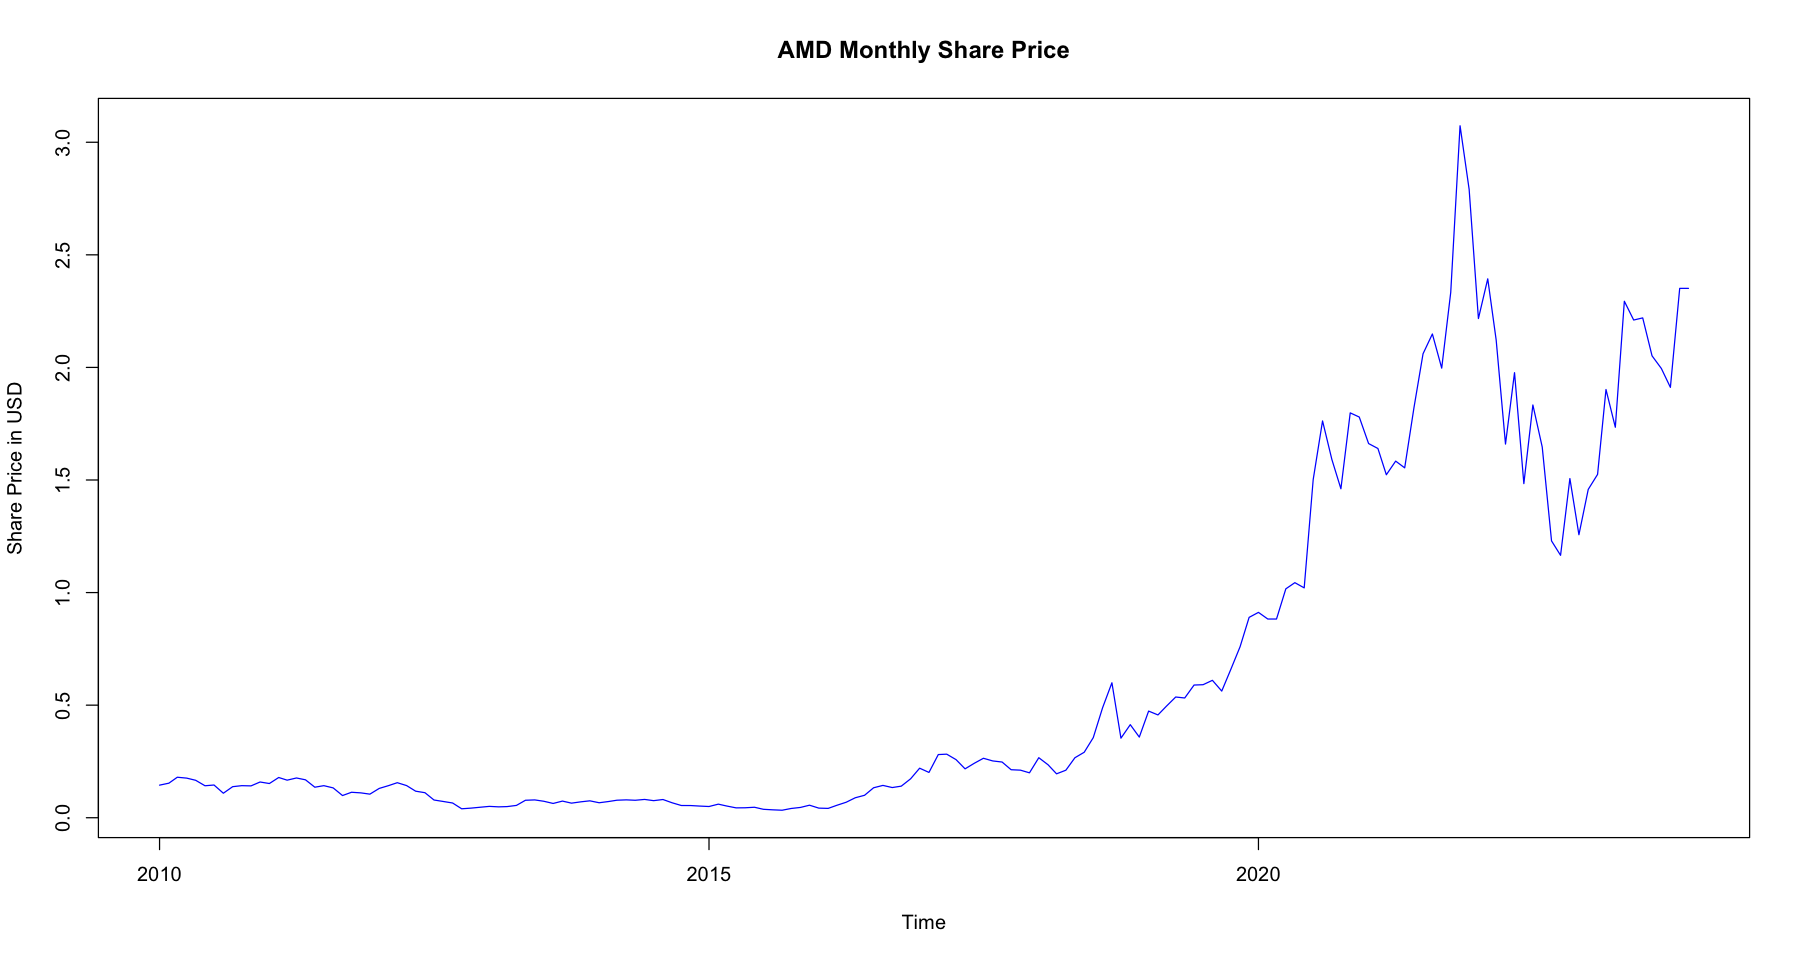

In [25]:
plot(AMD$Date, scale(AMD$Close, center = FALSE) ,type="l", col="blue", xlab="Time", ylab="Share Price in USD", main="AMD Monthly Share Price")

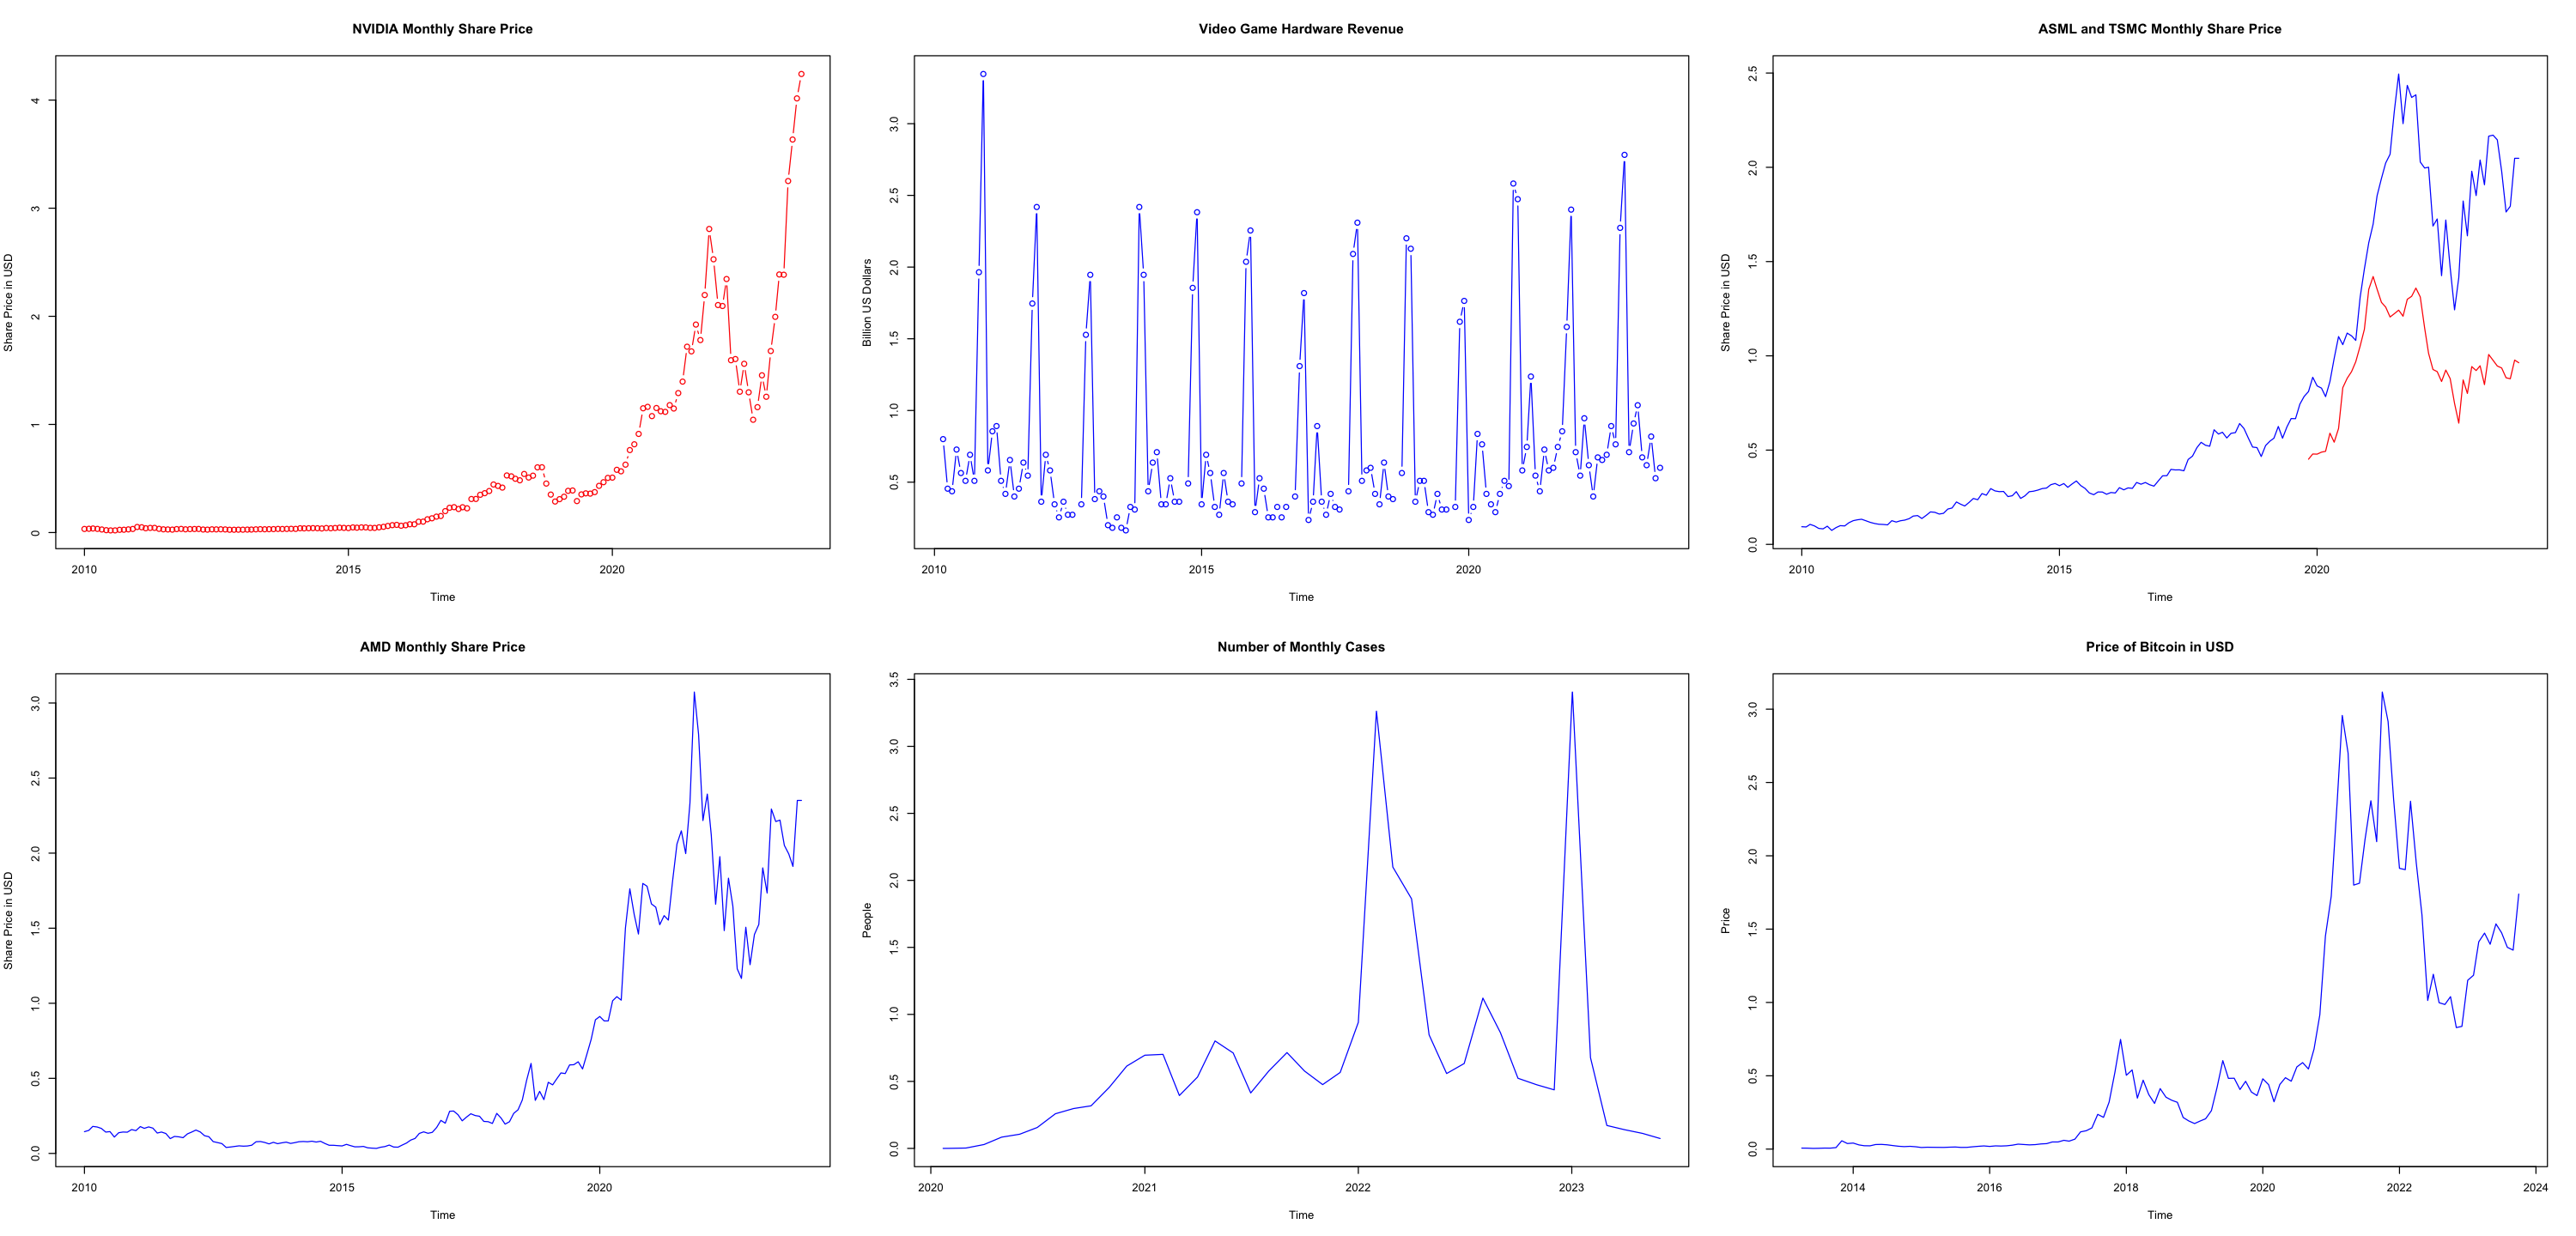

In [34]:
options(repr.plot.width=25, repr.plot.height=12)
par(mfrow = c(2, 3))
plot(nvidia$Date, scale(nvidia$Share_Price, center = FALSE) ,type="b", col="red", xlab="Time", ylab="Share Price in USD",main="NVIDIA Monthly Share Price")
plot(vidgame$Date , scale(vidgame$Hardware, center = FALSE) ,type="b", col="blue", xlab="Time", ylab="Billion US Dollars", main="Video Game Hardware Revenue")
plot(ASML$Date, scale(ASML$Close, center = FALSE) ,type="l", col="blue", xlab="Time", ylab="Share Price in USD", main="ASML and TSMC Monthly Share Price")
  lines(TSMC$Date, scale(TSMC$Close, center = FALSE) ,type="l", col="red")
plot(AMD$Date, scale(AMD$Close, center = FALSE) ,type="l", col="blue", xlab="Time", ylab="Share Price in USD", main="AMD Monthly Share Price")
plot(covid_monthly_ins$Date, scale(covid_monthly_ins$Inst, center = FALSE), type="l", col="blue", xlab="Time", ylab="People", main="Number of Monthly Cases")
plot(bitcoin$Date , scale(bitcoin$Price, center = FALSE) ,type="l", col="blue", xlab="Time", ylab="Price", main="Price of Bitcoin in USD")

# Filtered Data

In [35]:
# we cut the dataset from Jan 2020 to Dec 2022 to be the training set
# and choose the data from Jan 2023 to June 2023 to be the testing set 
## Cutting datasets for the non-covid datasets because it all started from

# Listing datasets in a named list
datasets_list <- list(nvidia_f = nvidia, AMD_f = AMD, ASML_f = ASML, TSMC_f = TSMC, vidgame_f = vidgame, covid_monthly_f = covid_monthly_ins, bitcoin_f = bitcoin)

# Filtering function
filter_dates <- function(filt) {
  filt %>%
    filter(Date >= as.Date('2020-01-01') & Date <= as.Date('2023-06-01')) #Change the date to 02 so that it will include the covid cases in december 2022
}

# Applying filter function to all the datasets and renaming
filtered_dataframes <- lapply(datasets_list, filter_dates)

# Unlist dataframes of the dataset
list2env(filtered_dataframes, envir = .GlobalEnv)

<environment: R_GlobalEnv>

In [36]:
head(covid_monthly_f, 3)
tail(covid_monthly_f, 3)

Date,Cases,Inst
<date>,<dbl>,<dbl>
2020-01-22,460,460
2020-02-01,11966,11506
2020-03-01,86443,74477


Date,Cases,Inst
<date>,<dbl>,<dbl>
2023-04-01,762267280,3877240
2023-05-02,765370087,3102807
2023-06-01,767422629,2052542


In [37]:
head(ASML_f)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2020-01-01,301.27,305.90,280.17,280.66,270.4319,15385800
2,2020-02-01,283.63,319.22,265.98,276.71,266.6258,18857500
3,2020-03-01,279.62,301.99,191.25,261.64,252.1051,36095100
4,2020-04-01,253.13,304.76,242.25,288.43,277.9188,17361100
5,2020-05-01,283.86,329.98,275.96,329.51,319.1093,15486500
6,2020-06-01,323.88,371.80,323.50,368.03,356.4135,15697800


# Modelling the NVIDIA time series

## Brief View of the Time Series

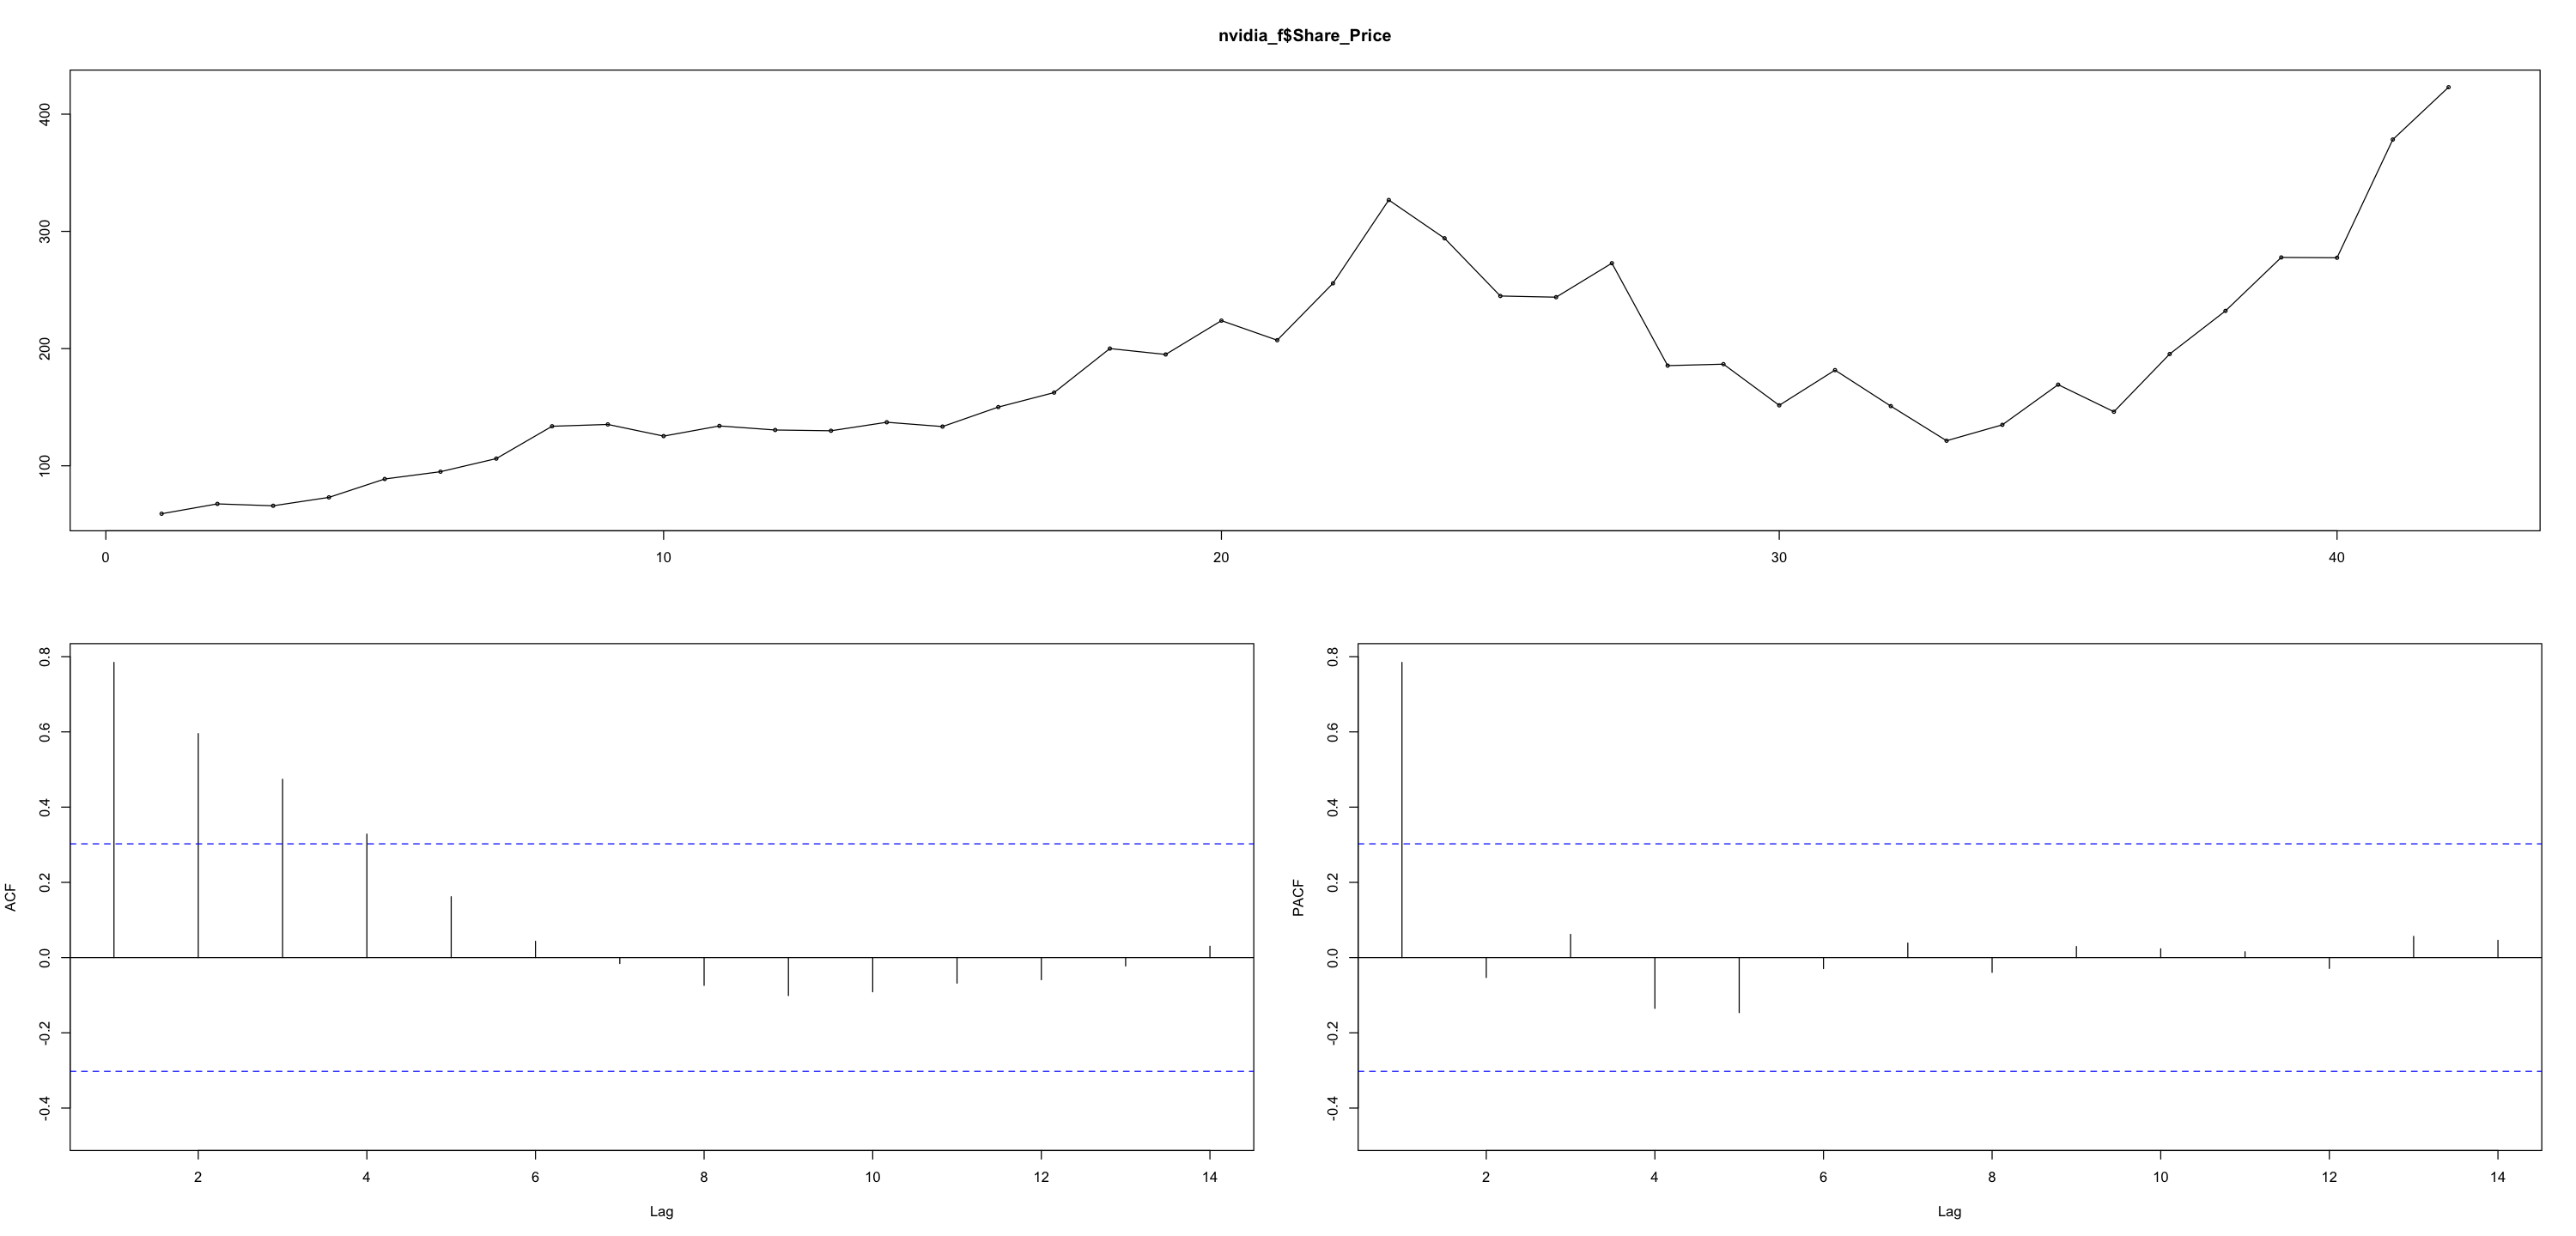

In [38]:
tsdisplay(nvidia_f$Share_Price)

## TSML Model

In [39]:
# # tslm models fitting
# # change date type to time series (8 in total)
# nvidia_ts <- ts(nvidia_f$Share_Price, freq=4)
# vidgame_ts <- ts(vidgame_f$Hardware)
# ASML_ts <- ts(ASML_f$Close)
# TSMC_ts <- ts(TSMC_f$Close)
# AMD_ts <- ts(AMD_f$Close)
# covid_ts <- ts(covid_monthly_f$Cases)
# bitcoin_ts <- ts(bitcoin_f$Price)

In [40]:
# tslm models fitting
# change date type to time series (8 in total)
nvidia_ts <- ts(scale(nvidia_f$Share_Price, center = FALSE), freq=4)
vidgame_ts <- ts(scale(vidgame_f$Hardware, center = FALSE))
ASML_ts <- ts(scale(ASML_f$Close, center = FALSE))
TSMC_ts <- ts(scale(TSMC_f$Close, center = FALSE))
AMD_ts <- ts(scale(AMD_f$Close, center = FALSE))
covid_ts <- ts(scale(covid_monthly_f$Inst, center = FALSE))
bitcoin_ts <- ts(scale(bitcoin_f$Price, center = FALSE))


## covid cumulative
#covid_ts <- ts(scale(covid_monthly_f$Inst, center = FALSE))

### Model 1: with all the variables

In [41]:
fit.tslm_all <- tslm(nvidia_ts ~ trend + season + AMD_ts + vidgame_ts+ASML_ts+TSMC_ts+bitcoin_ts+covid_ts)
summary(fit.tslm_all)


Call:
tslm(formula = nvidia_ts ~ trend + season + AMD_ts + vidgame_ts + 
    ASML_ts + TSMC_ts + bitcoin_ts + covid_ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27188 -0.09424  0.01762  0.05377  0.42805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.27099    0.13479  -2.010  0.05315 .  
trend        0.01098    0.00320   3.431  0.00172 ** 
season2      0.04861    0.06547   0.742  0.46339    
season3     -0.04869    0.07476  -0.651  0.51965    
season4     -0.04977    0.07337  -0.678  0.50262    
AMD_ts       1.03725    0.15600   6.649 1.96e-07 ***
vidgame_ts  -0.04811    0.04908  -0.980  0.33463    
ASML_ts      0.52690    0.25530   2.064  0.04748 *  
TSMC_ts     -0.44001    0.20565  -2.140  0.04037 *  
bitcoin_ts  -0.03583    0.12275  -0.292  0.77231    
covid_ts    -0.07476    0.03509  -2.131  0.04114 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1506 on 31 degrees of freedom

#### We can see from the result some of variables are not significant

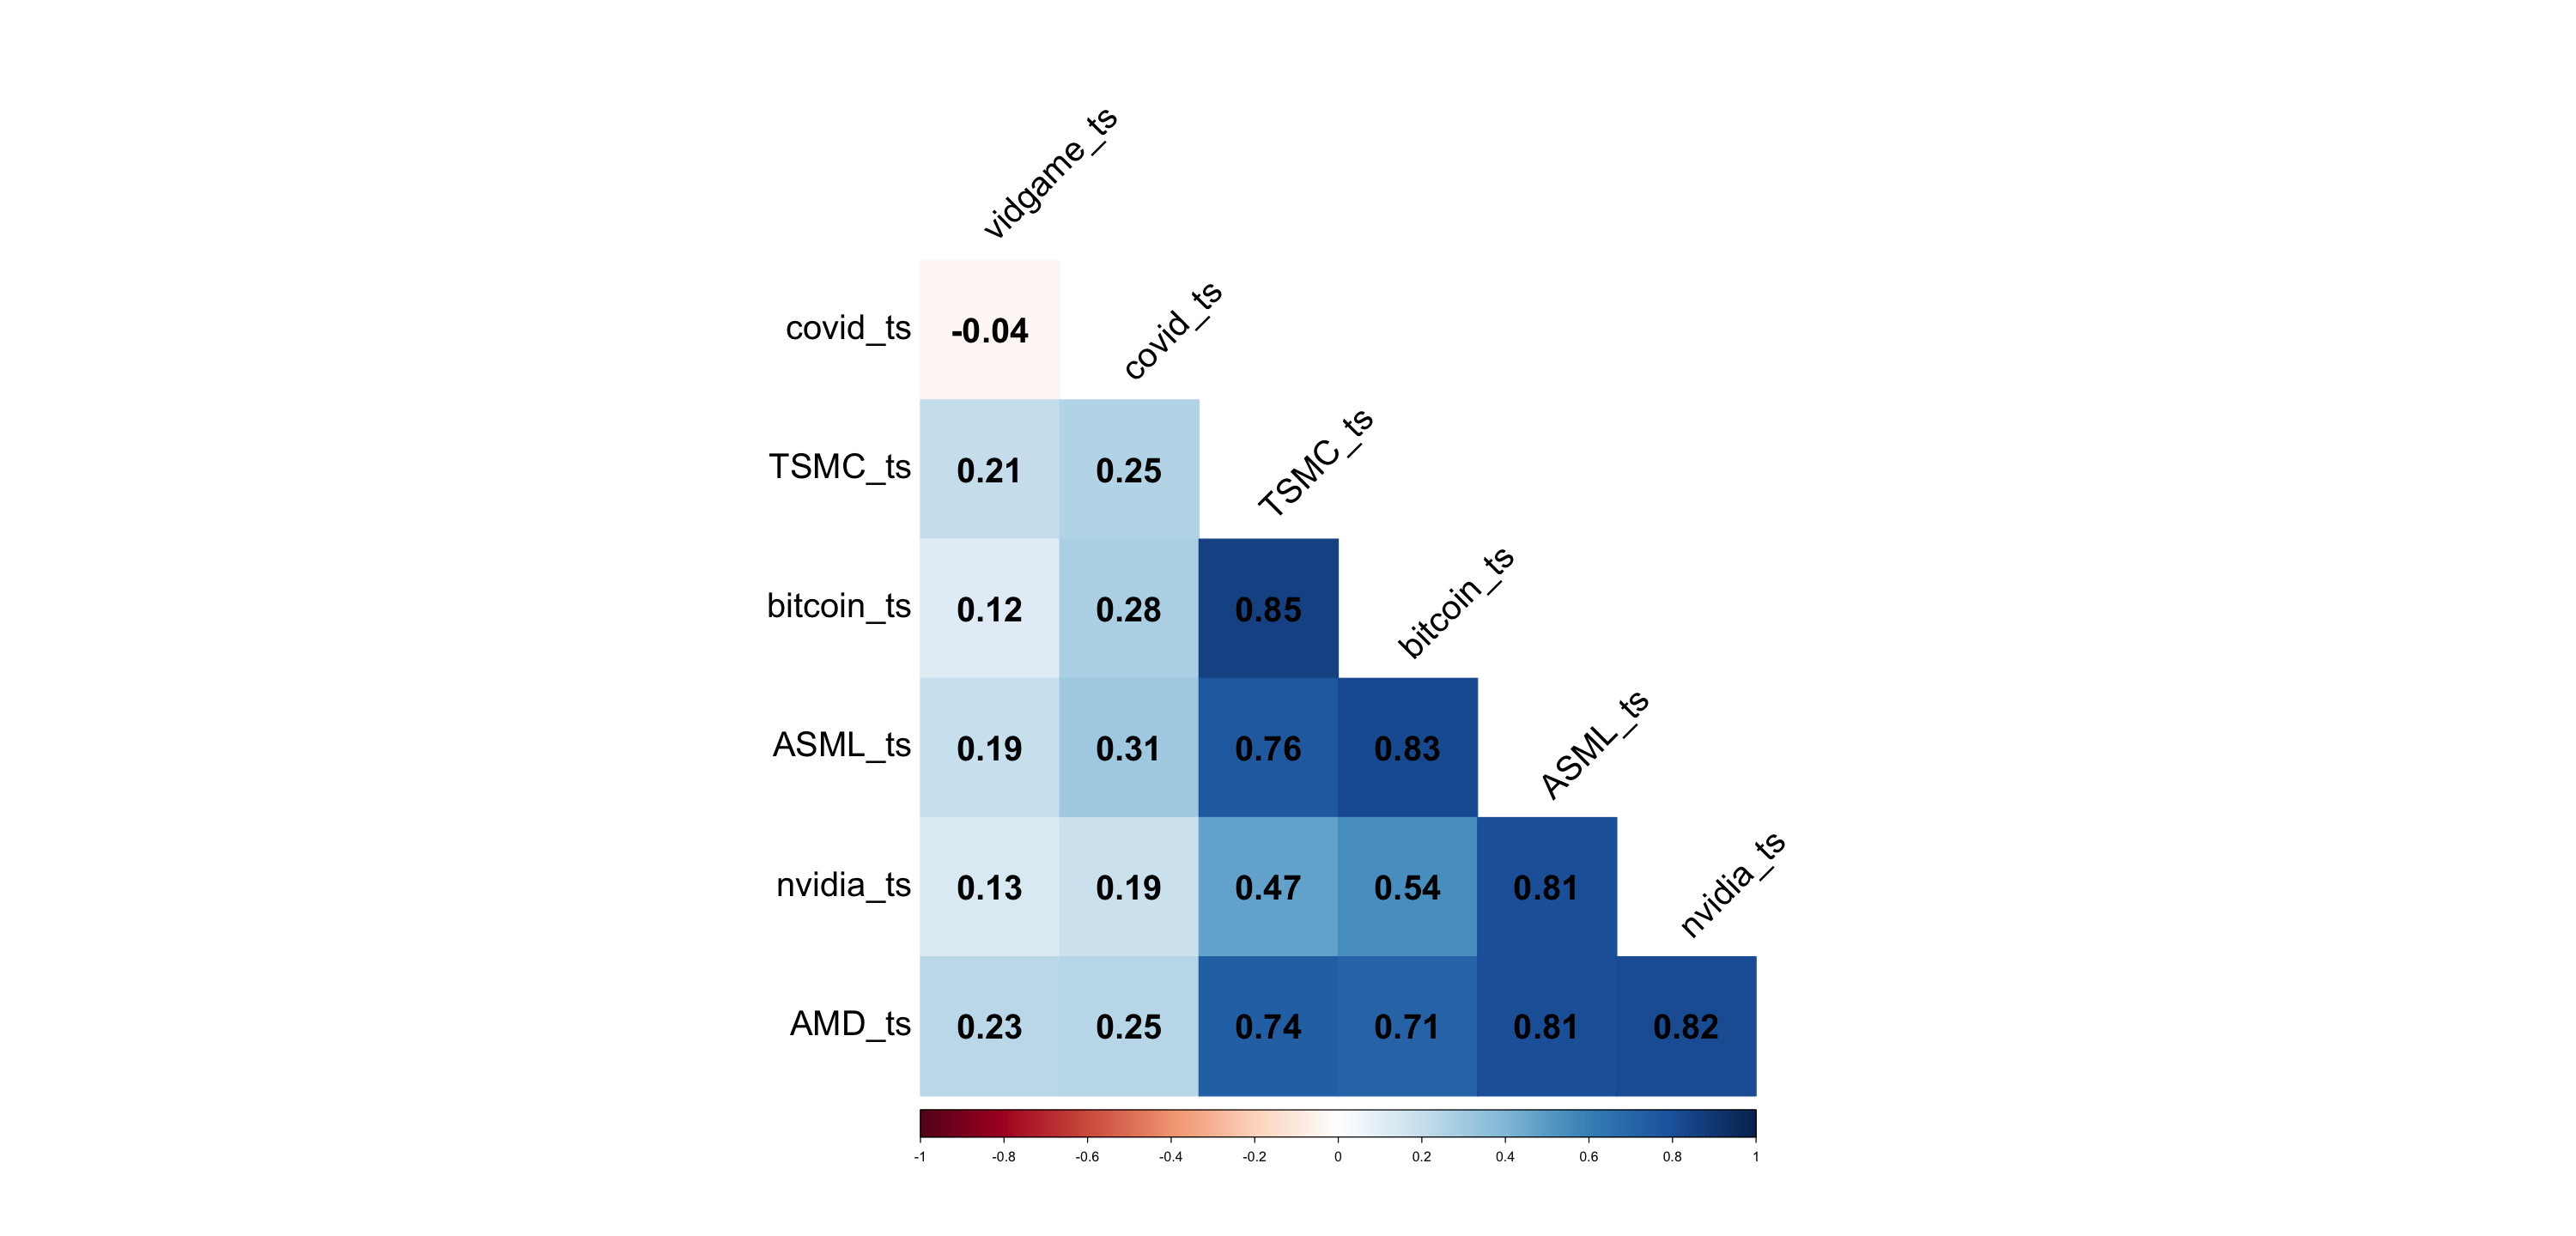

In [42]:
# correlation table to check all correlations between variables
nvidia_ts <- ts(scale(nvidia_f$Share_Price, center = FALSE))
combined_ts <- cbind(nvidia_ts, vidgame_ts, ASML_ts, TSMC_ts, AMD_ts, covid_ts, bitcoin_ts)
cor_matrix <- cor(combined_ts)
corrplot(cor_matrix, method = "color", type = "lower", order = "hclust", tl.col = "black", tl.srt = 45, tl.cex = 2,
         addCoef.col = "black", number.cex = 2,diag = FALSE)

Based on the correlation table, we take the explanatory variables to be AMD, vidgame, and covid. We then applied Backward Elimination to find the best combination of explanatory variables. This results in AMD, vidgame, and covid as the best variables.  


-- RECORD OF ALL COMBINATIONS
- R square for AMD COVID VIDGAME 0.8547  (The best results)
- R square for AMD COVID 0.8401  
- R squared for AMD VIDGAME 0.836  
- R squared for AMD 0.8271 
- R squared for COVID VIDGAME  0.4508 

### AMD - COVID - VIDGAME

In [43]:
fit.tslm_AVC <- tslm(nvidia_ts ~  trend+AMD_ts + covid_ts + vidgame_ts)
summary(fit.tslm_AVC)


Call:
tslm(formula = nvidia_ts ~ trend + AMD_ts + covid_ts + vidgame_ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28417 -0.07136 -0.00907  0.07957  0.50404 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.308687   0.089542  -3.447  0.00143 ** 
trend        0.017100   0.002281   7.498 6.21e-09 ***
AMD_ts       1.027027   0.099449  10.327 1.89e-12 ***
covid_ts    -0.086292   0.035546  -2.428  0.02018 *  
vidgame_ts  -0.096468   0.043862  -2.199  0.03418 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.157 on 37 degrees of freedom
Multiple R-squared:  0.8689,	Adjusted R-squared:  0.8547 
F-statistic: 61.31 on 4 and 37 DF,  p-value: 8.089e-16


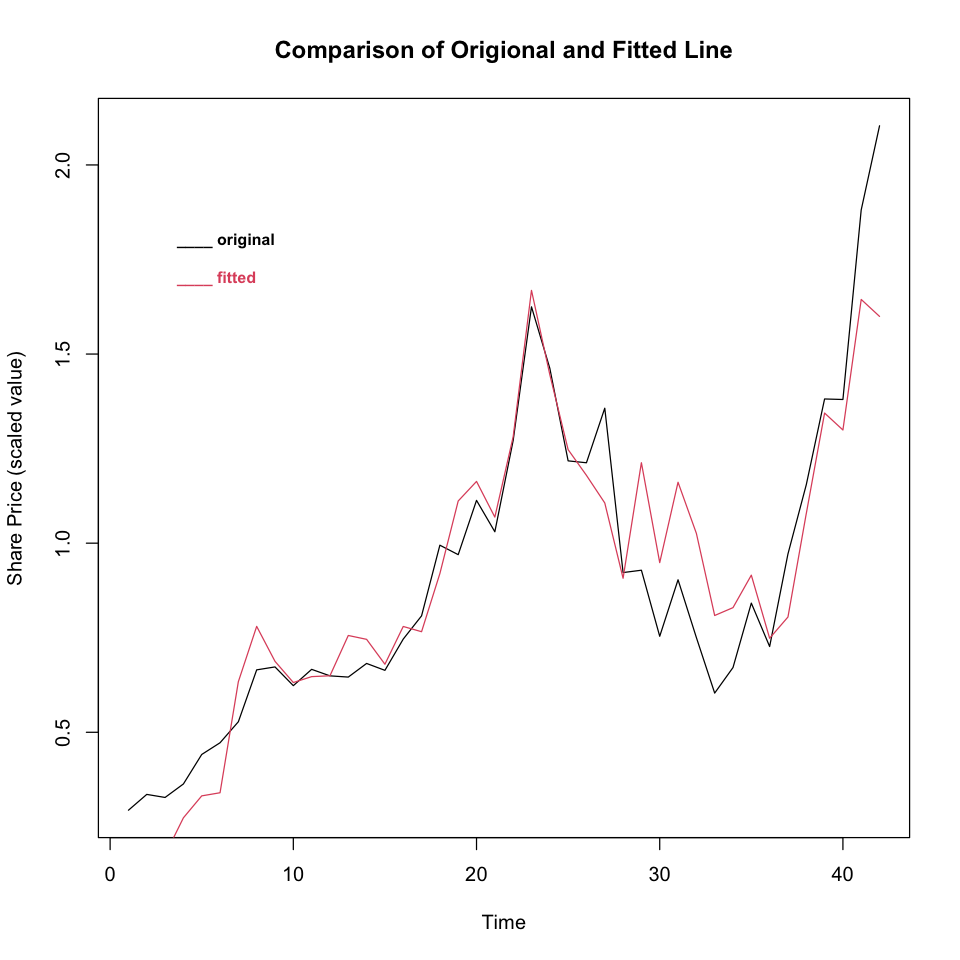

In [44]:
options(repr.plot.width=8, repr.plot.height=8)
plot(nvidia_ts, ylab='Share Price (scaled value)', main='Comparison of Origional and Fitted Line',)
lines(fitted(fit.tslm_AVC), col=2)
text(3, 1.8, "____ original", pos=4, cex=0.8, font=2, col=1)
text(3, 1.7, "____ fitted", pos=4, cex=0.8, font=2, col=2)

### AMD - COVID

In [45]:
fit.tslm_AC <- tslm(nvidia_ts ~  trend+AMD_ts + covid_ts )
summary(fit.tslm_AC)


Call:
tslm(formula = nvidia_ts ~ trend + AMD_ts + covid_ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25590 -0.10252 -0.00578  0.08739  0.54506 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.336937   0.092983  -3.624 0.000847 ***
trend        0.016286   0.002361   6.897 3.39e-08 ***
AMD_ts       0.986244   0.102520   9.620 9.91e-12 ***
covid_ts    -0.075315   0.036928  -2.040 0.048394 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1648 on 38 degrees of freedom
Multiple R-squared:  0.8518,	Adjusted R-squared:  0.8401 
F-statistic: 72.78 on 3 and 38 DF,  p-value: 8.232e-16


### AMD - VIDGAME

In [46]:
fit.tslm_AV <- tslm(nvidia_ts ~  trend+AMD_ts + vidgame_ts )
summary(fit.tslm_AV)


Call:
tslm(formula = nvidia_ts ~ trend + AMD_ts + vidgame_ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29780 -0.08022 -0.01361  0.09935  0.59782 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.308059   0.095133  -3.238   0.0025 ** 
trend        0.015572   0.002329   6.686 6.55e-08 ***
AMD_ts       0.988468   0.104303   9.477 1.49e-11 ***
vidgame_ts  -0.081517   0.046139  -1.767   0.0853 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1668 on 38 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.836 
F-statistic: 70.68 on 3 and 38 DF,  p-value: 1.319e-15


### AMD 

In [47]:
fit.tslm_AMD <- tslm(nvidia_ts ~  trend+AMD_ts)
summary(fit.tslm_AMD)


Call:
tslm(formula = nvidia_ts ~ trend + AMD_ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27847 -0.12031 -0.02589  0.09839  0.62290 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.332480   0.096649  -3.440   0.0014 ** 
trend        0.015037   0.002371   6.342 1.74e-07 ***
AMD_ts       0.957541   0.105583   9.069 3.78e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1713 on 39 degrees of freedom
Multiple R-squared:  0.8355,	Adjusted R-squared:  0.8271 
F-statistic: 99.07 on 2 and 39 DF,  p-value: 5.169e-16


### COVID- VIDGAME

In [48]:
fit.tslm_CV <- tslm(nvidia_ts ~  trend+covid_ts + vidgame_ts )
summary(fit.tslm_CV)


Call:
tslm(formula = nvidia_ts ~ trend + covid_ts + vidgame_ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56868 -0.14183 -0.03294  0.13633  0.69128 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.408972   0.109789   3.725 0.000633 ***
trend        0.024147   0.004231   5.707 1.44e-06 ***
covid_ts    -0.027665   0.068224  -0.405 0.687385    
vidgame_ts  -0.012009   0.083785  -0.143 0.886781    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3053 on 38 degrees of freedom
Multiple R-squared:  0.491,	Adjusted R-squared:  0.4508 
F-statistic: 12.22 on 3 and 38 DF,  p-value: 9.638e-06


## CONSIDER LAGGED Variable Time Series

In [49]:
# variable lag
lag <- seq(-12, 12, by = 1)

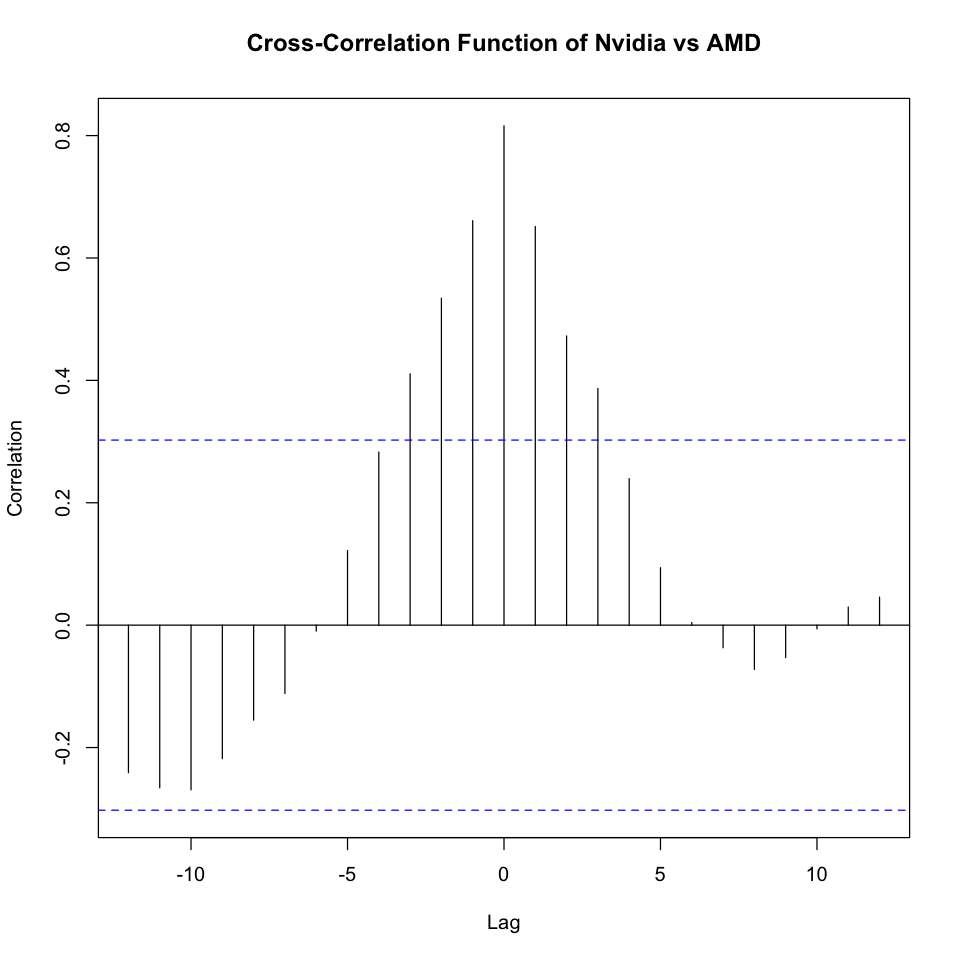

In [50]:
# cross-correlation between NVIDIA and AMD
ccf_amd <- ccf(as.numeric(nvidia_ts), as.numeric(AMD_ts), lag.max=12, plot = FALSE)
plot(ccf_amd, main = "Cross-Correlation Function of Nvidia vs AMD", xlab = "Lag", ylab = "Correlation")

In [51]:
max_corr_amd <- max(abs(ccf_amd$acf))
max_lag_amd <- which(abs(ccf_amd$acf) == max_corr_amd)
lag_amd <- lag[max_lag_amd]
cat('The best lag value is:', lag_amd)

The best lag value is: 0

#### In the VIDGAME revenue, we will consider no lag

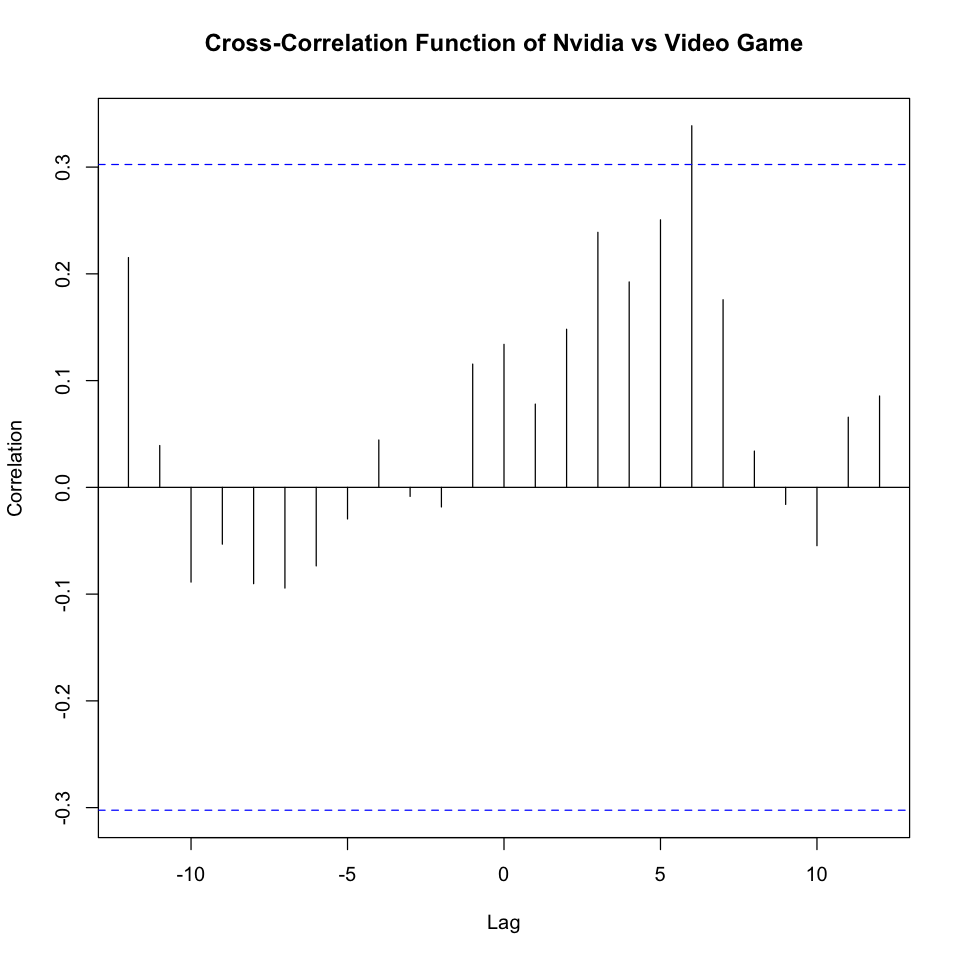

In [52]:
# cross-correlation between NVIDIA and VIDGAME
ccf_vidgame <- ccf(as.numeric(nvidia_ts), as.numeric(vidgame_ts), lag.max=12, plot=FALSE)
plot(ccf_vidgame, main = "Cross-Correlation Function of Nvidia vs Video Game", xlab = "Lag", ylab = "Correlation")
# max_corr_vidgame <- max(abs(ccf_vidgame$acf))
# max_lag_vidgame <- which(abs(ccf_vidgame$acf) == max_corr_vidgame)
# lag_vidgame <- lag[max_lag_vidgame]
# print(lag_vidgame)

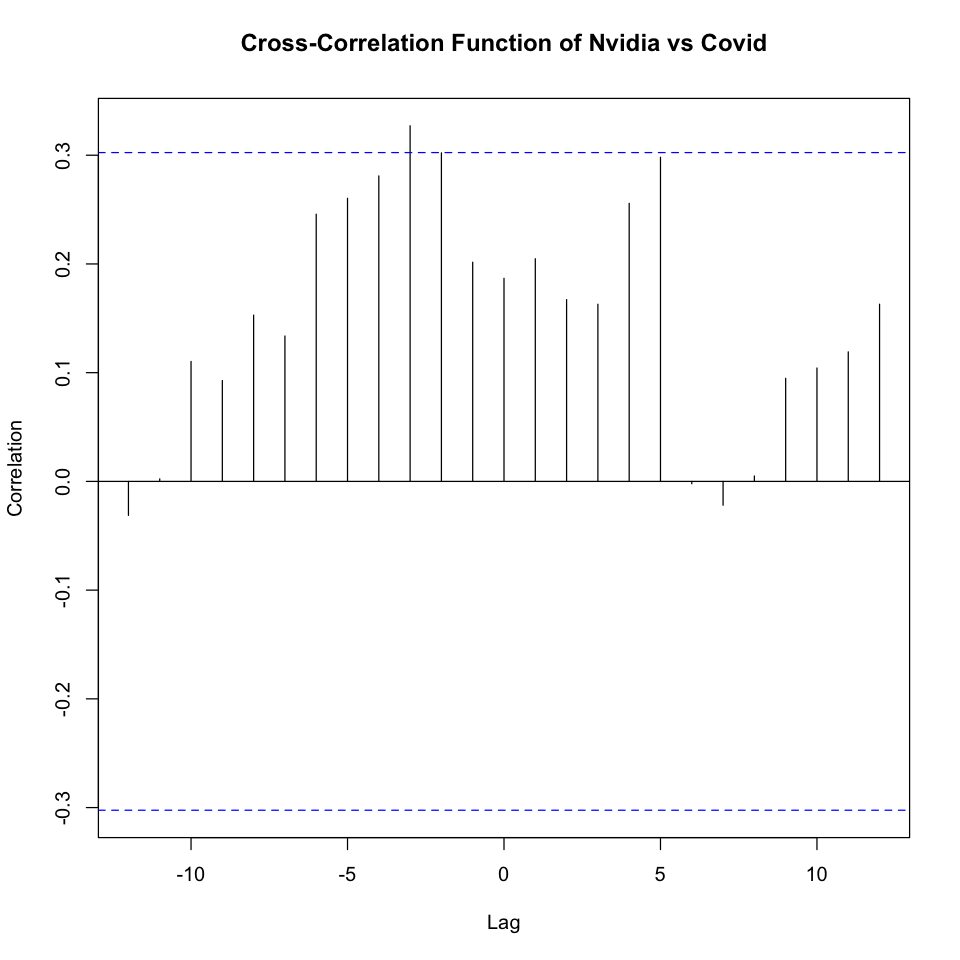

In [53]:
# cross-correlation between NVIDIA and COVID
ccf_cov <- ccf(as.numeric(nvidia_ts), as.numeric(covid_ts), lag.max=12, plot=FALSE)
plot(ccf_cov, main = "Cross-Correlation Function of Nvidia vs Covid", xlab = "Lag", ylab = "Correlation")

In [54]:
max_corr <- max(abs(ccf_cov$acf))
max_lag <- which(abs(ccf_cov$acf) == max_corr)
lag_cov <- lag[max_lag]
print(ccf_cov)
cat('\n')
cat('The best lag value is:', lag_cov)


Autocorrelations of series ‘X’, by lag

   -12    -11    -10     -9     -8     -7     -6     -5     -4     -3     -2 
-0.031  0.002  0.110  0.093  0.153  0.134  0.246  0.260  0.281  0.327  0.302 
    -1      0      1      2      3      4      5      6      7      8      9 
 0.202  0.187  0.205  0.167  0.163  0.256  0.298 -0.002 -0.022  0.005  0.095 
    10     11     12 
 0.104  0.119  0.163 

The best lag value is: -3

In [55]:
# adjusting variables TS Lagged 3 months 
adjust_nvidia <- ts(nvidia_ts[4:length(nvidia_ts)])
adjust_amd <- ts(AMD_ts[4:length(AMD_ts)])
adjust_vidgame <- ts(vidgame_ts[4:length(vidgame_ts)])
adjust_cov <- ts(covid_ts[1:(length(covid_ts)-3)])

# lagged adjusted TSLM (Lagged 3 Month)
fit.tslm_AC_adjust_3 <- tslm(adjust_nvidia ~ trend + adjust_amd + adjust_cov + adjust_vidgame)
summary(fit.tslm_AC_adjust_3)


Call:
tslm(formula = adjust_nvidia ~ trend + adjust_amd + adjust_cov + 
    adjust_vidgame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31146 -0.06497 -0.01611  0.03777  0.45604 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.353436   0.104788  -3.373  0.00187 ** 
trend           0.020032   0.002617   7.654 6.76e-09 ***
adjust_amd      1.056293   0.103348  10.221 6.65e-12 ***
adjust_cov     -0.093724   0.038376  -2.442  0.01995 *  
adjust_vidgame -0.092032   0.043725  -2.105  0.04278 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1557 on 34 degrees of freedom
Multiple R-squared:  0.8596,	Adjusted R-squared:  0.8431 
F-statistic: 52.03 on 4 and 34 DF,  p-value: 5.01e-14


#### BEST MODEL IS AMD+VIDGAME+COVID

### RESIDUAL CHECK


	Ljung-Box test

data:  Residuals
Q* = 27.635, df = 8, p-value = 0.000549

Model df: 0.   Total lags used: 8



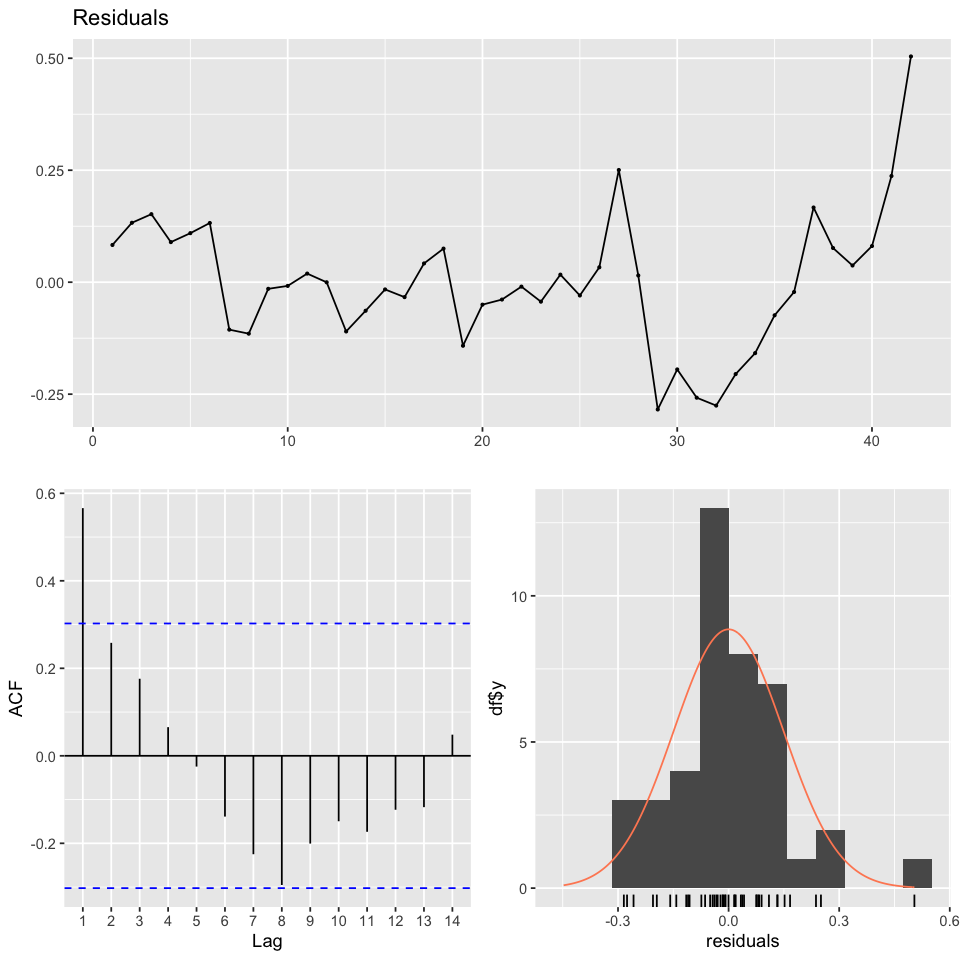

In [56]:
# residual <- residuals(fit.tslm_AC_adjust)
residual <- residuals(fit.tslm_AVC)
checkresiduals(residual)

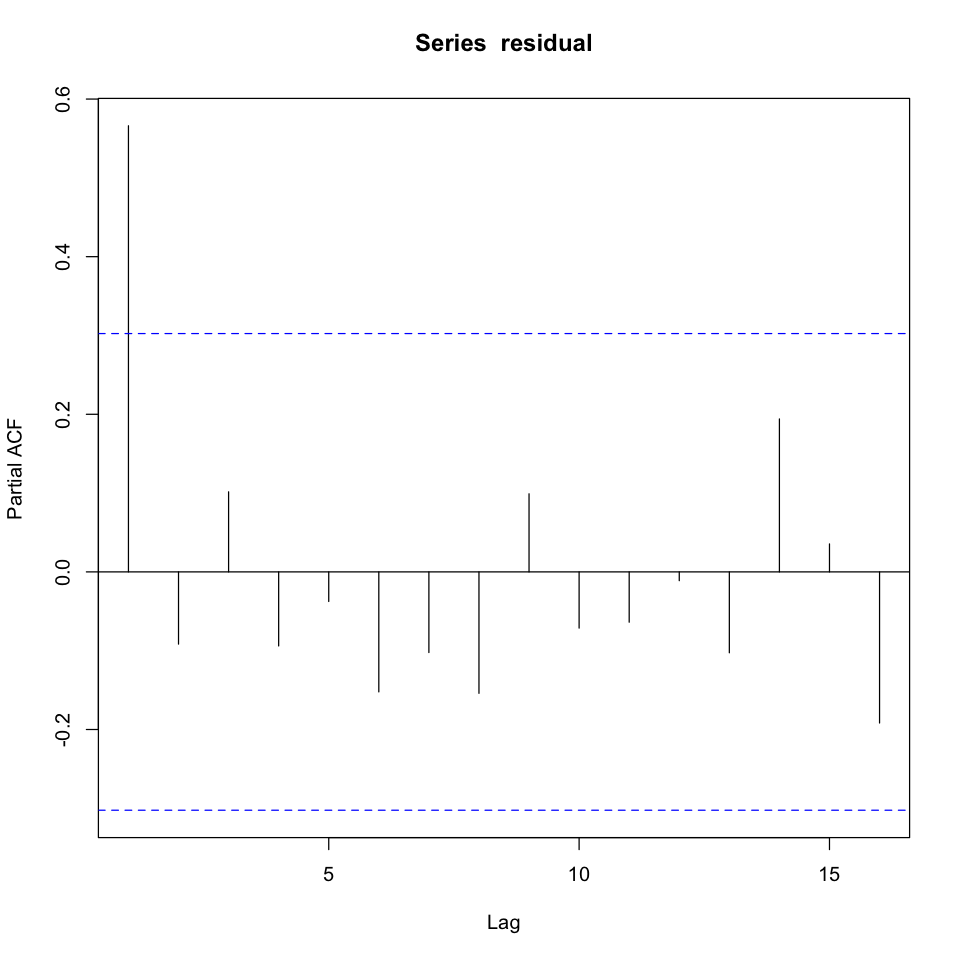

In [57]:
pacf(residual)


	Durbin-Watson test

data:  fit.tslm_AVC
DW = 0.58176, p-value = 2.504e-09
alternative hypothesis: true autocorrelation is not 0


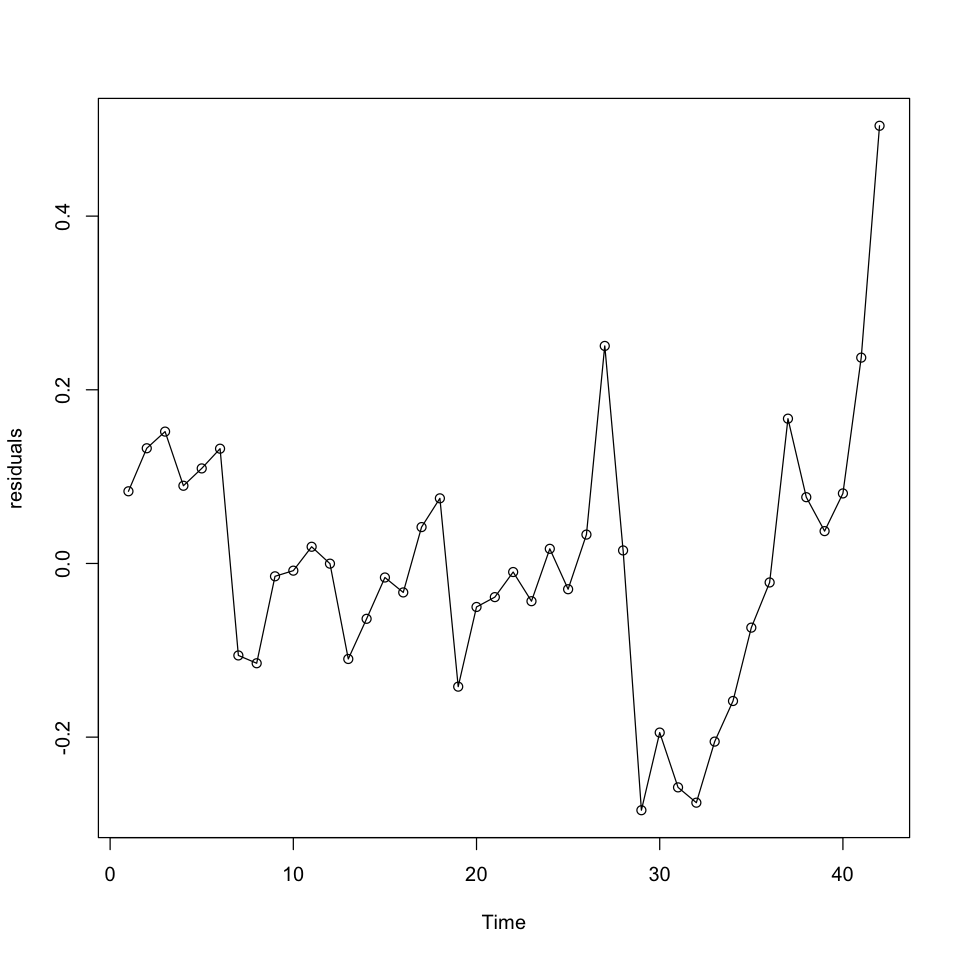

In [58]:
dwt<- dwtest(fit.tslm_AVC, alt="two.sided")
dwt
plot(residual,xlab="Time", ylab="residuals", type="o" )

#### DW value is not close to 2, so autocorrelation is there in the residual

### ARIMA FOR RESIDUAL

In [59]:
auto.a1 <- auto.arima(residual)
auto.a1

Series: residual 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1     ma1
      0.4874  0.5075
s.e.  0.2350  0.2396

sigma^2 = 0.01178:  log likelihood = 34.18
AIC=-62.37   AICc=-61.74   BIC=-57.16

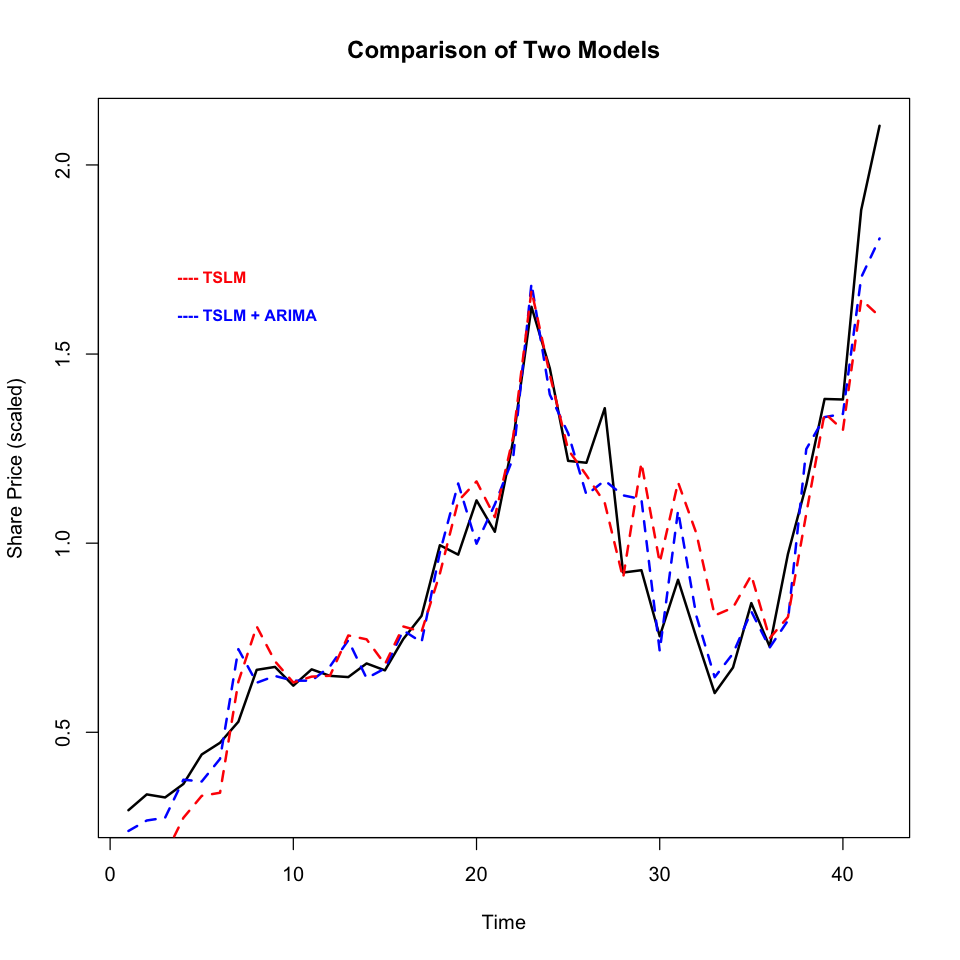

In [60]:
plot(ts(nvidia_ts), lwd=2, ylab='Share Price (scaled)', main='Comparison of Two Models')
lines(fitted(fit.tslm_AVC)+fitted(auto.a1), col='blue', lwd=2, lty=2)
lines(fitted(fit.tslm_AVC), col='red', lwd=2, lty=2)
text(3, 1.7, "---- TSLM", pos=4, cex=0.8, font=2, col='red')
text(3, 1.6, "---- TSLM + ARIMA", pos=4, cex=0.8, font=2, col='blue')

In [61]:
# the error of model: TSLM + ARIMA
err1 <- sum((fitted(fit.tslm_AVC)+fitted(auto.a1)-ts(nvidia_ts))^2)
cat('error of model TSLM + ARIMA is', err1)

error of model TSLM + ARIMA is 0.4713737

In [62]:
# the error of model: TSLM
err2 <- sum((fitted(fit.tslm_AVC)-ts(nvidia_ts))^2)
cat('error for model TSLM is',err2)

error for model TSLM is 0.9123301


	Ljung-Box test

data:  Residuals
Q* = 4.1238, df = 8, p-value = 0.8458

Model df: 0.   Total lags used: 8



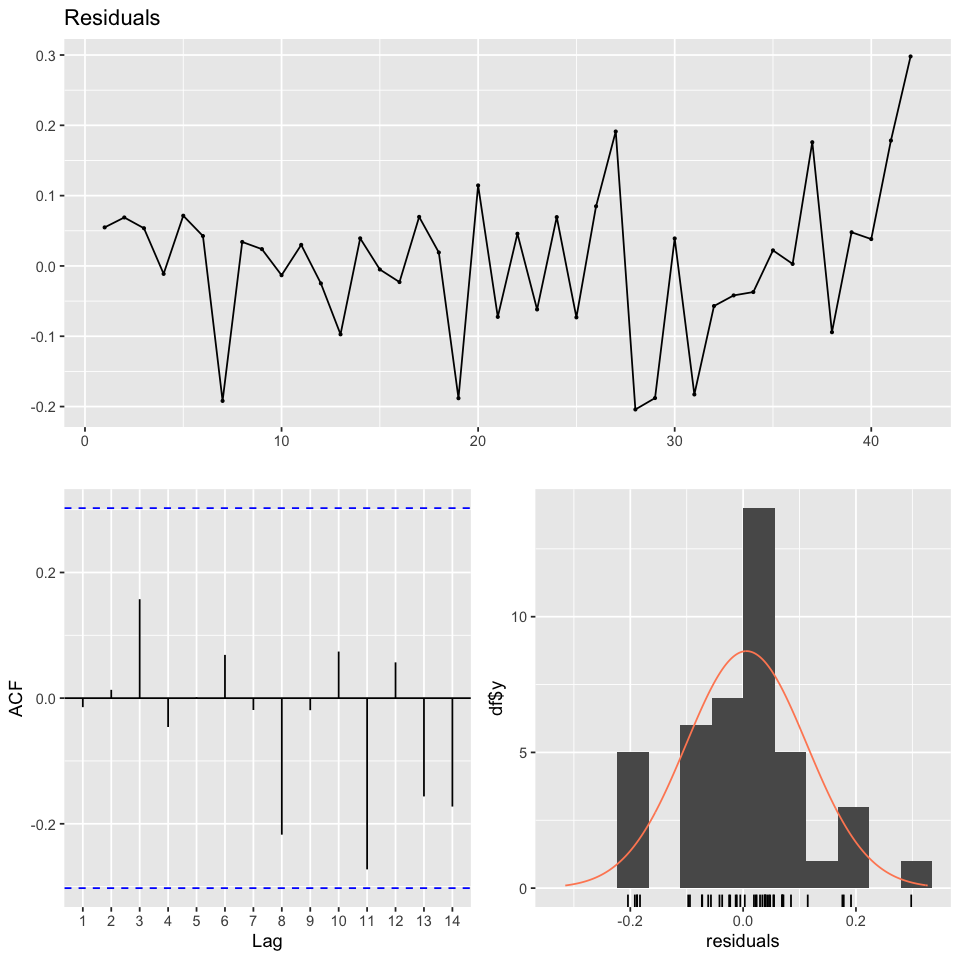

In [63]:
combined_fitted_values <- fitted(fit.tslm_AVC) + fitted(auto.a1)
residuals <- nvidia_ts - combined_fitted_values
checkresiduals(residuals)

#### After applying ARIMA to the residual, we get lower value for Q* and ACF

#### So for the expalining part, our final model is TSLM(~TREND+AMD+COVID+VIDEOGAME) + ARIMA

# FORECASTING

In [64]:
# # Testing dataset readjusting because of the lag, we will start from 2022-12-01 for the test variables to predict the NVIDIA 2023-01-01
# # Listing datasets in a named list
# testsets_list <- list(AMD_t = AMD, ASML = ASML, TSMC_t = TSMC, vidgame_t = vidgame, nvidia_t = nvidia, covid_monthly_t = covid_monthly_ins, bitcoin_t = bitcoin)

# # Filtering function
# filter_dates3 <- function(filt) {
#   filt %>% 
#     filter(Date >= as.Date('2022-12-01') & Date <= as.Date('2023-06-01'))
# }

# # Applying filter function to all the datasets and renaming
# test_dataframes <- lapply(testsets_list, filter_dates3)

# # Unlist dataframes of the dataset
# list2env(test_dataframes, envir = .GlobalEnv)

In [65]:
# Splitting the data into train and test sets using indexing
nvidia_train <- nvidia_ts[4:36]
nvidia_test <- nvidia_ts[37:length(nvidia_ts)]

vidgame_train <- vidgame_ts[3:35]
vidgame_test <- vidgame_ts[36:(length(vidgame_ts)-1)]

AMD_train <- AMD_ts[3:35]
AMD_test <- AMD_ts[36:(length(AMD_ts)-1)]

covid_train <- covid_ts[1:33]
covid_test <- covid_ts[34:(length(covid_ts)-3)]

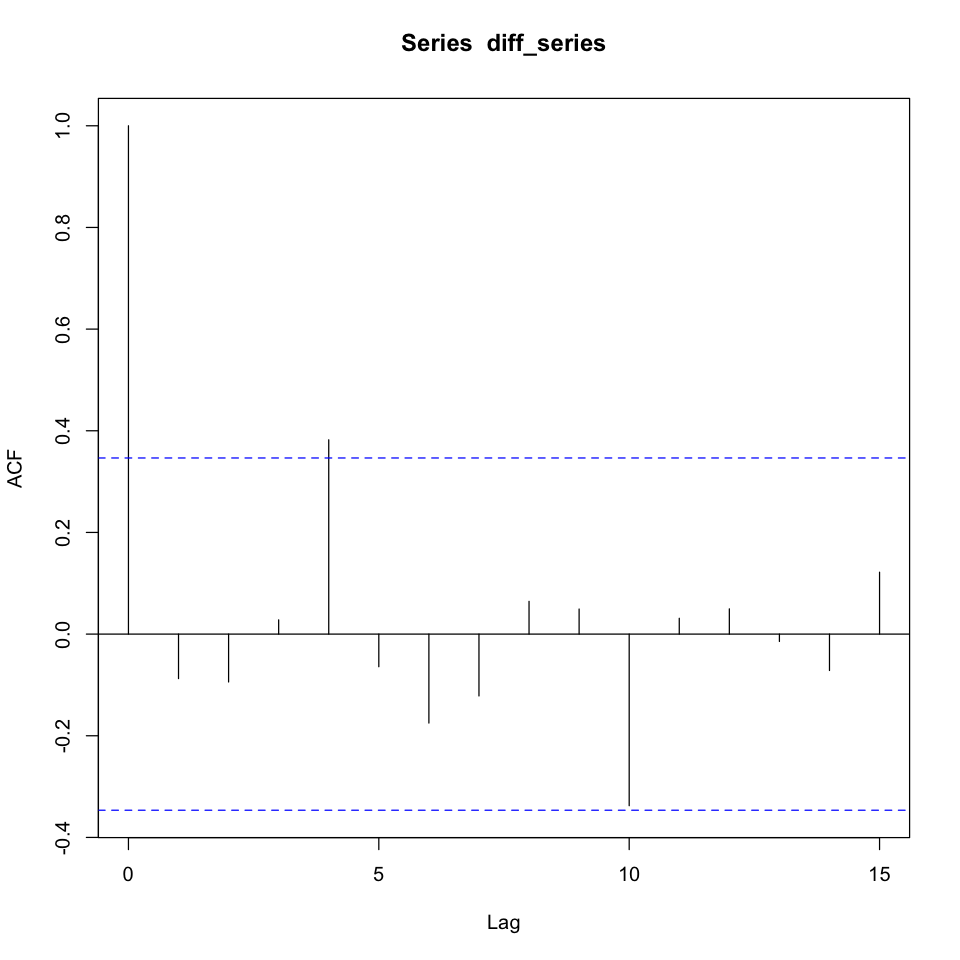

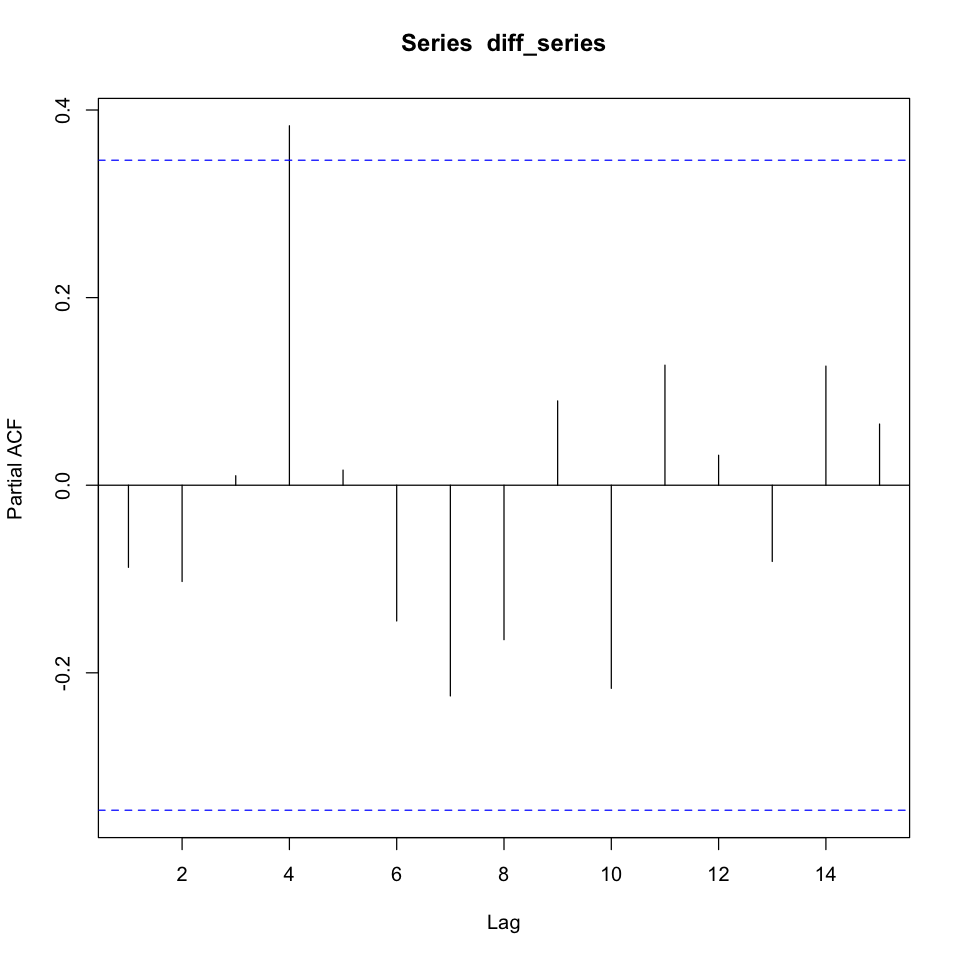

In [66]:
# To check data
# First difference
diff_series <- diff(nvidia_train, differences = 1)

# Re-plot the ACF and PACF for the differenced series
acf(diff_series, plot = TRUE)
pacf(diff_series, plot = TRUE)

In [67]:
xvars <- cbind(AMD_train, covid_train, vidgame_train)

#### WE PICK AUTOARIMA

In [68]:
aa <- auto.arima(nvidia_train, xreg=xvars)
# aa <- Arima(nvidia_train, order=c(1,1,4),  xreg=xvars)
summary(aa)

Series: nvidia_train 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept  AMD_train  covid_train  vidgame_train
      0.8077     0.5601     0.2763       0.0651        -0.0698
s.e.  0.1299     0.2186     0.2188       0.0536         0.0453

sigma^2 = 0.02276:  log likelihood = 17.77
AIC=-23.55   AICc=-20.32   BIC=-14.57

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.01034969 0.1389623 0.1026449 -1.178406 11.93352 0.9054515
                    ACF1
Training set 0.001621722

Warning message in forecast.forecast_ARIMA(aa, xreg = future_xreg):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”


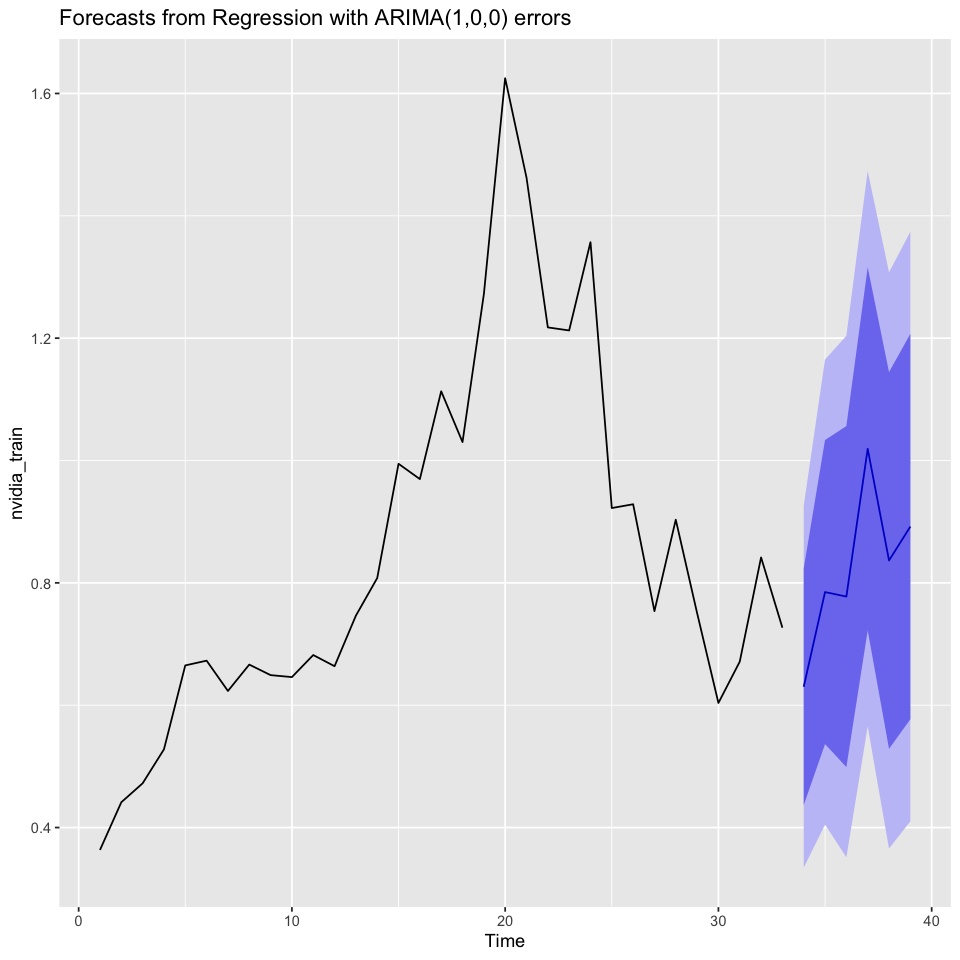

In [69]:
future_xreg <- cbind(AMD_test, covid_test, vidgame_test)
fa <- (forecast(aa,xreg=future_xreg))
autoplot(fa)

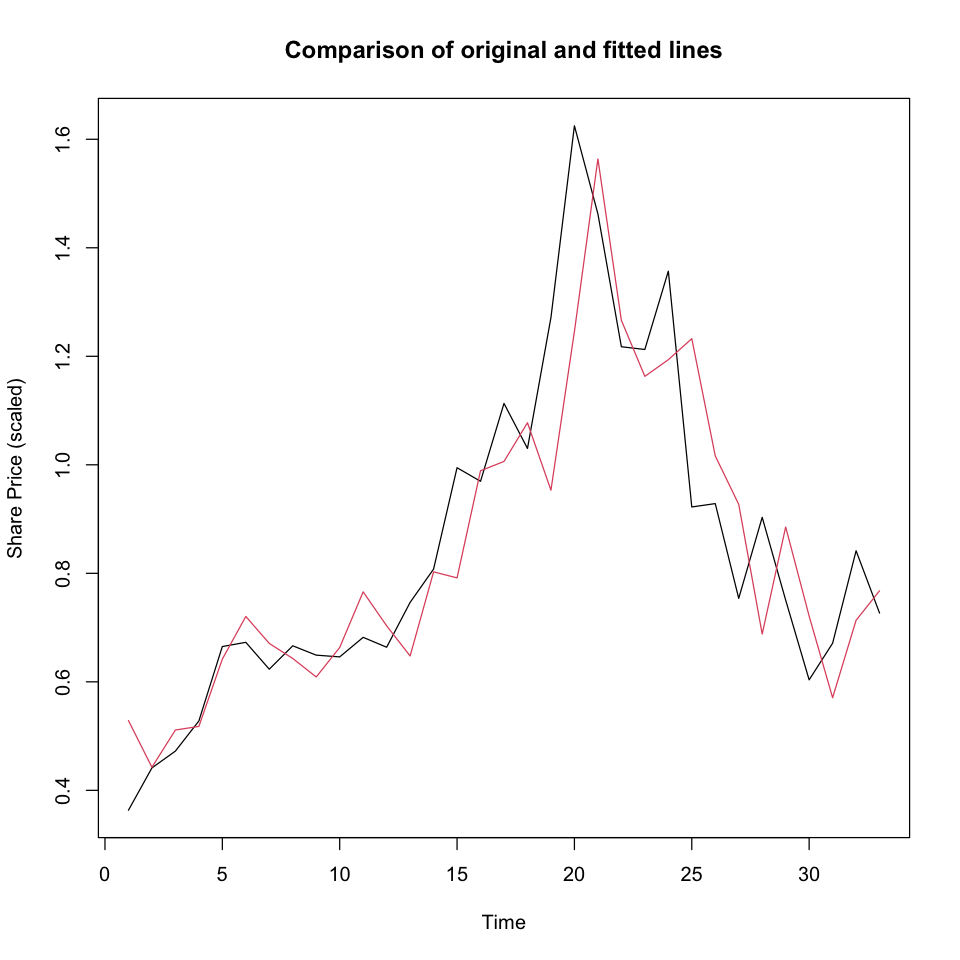

In [70]:
plot(ts(nvidia_train), main='Comparison of original and fitted lines', ylab='Share Price (scaled)')
lines(fitted(aa), col=2)
text(2, 1.8, "____ original", pos=4, cex=0.8, font=2, col=1)
text(2, 1.7, "____ fitted", pos=4, cex=0.8, font=2, col=2)

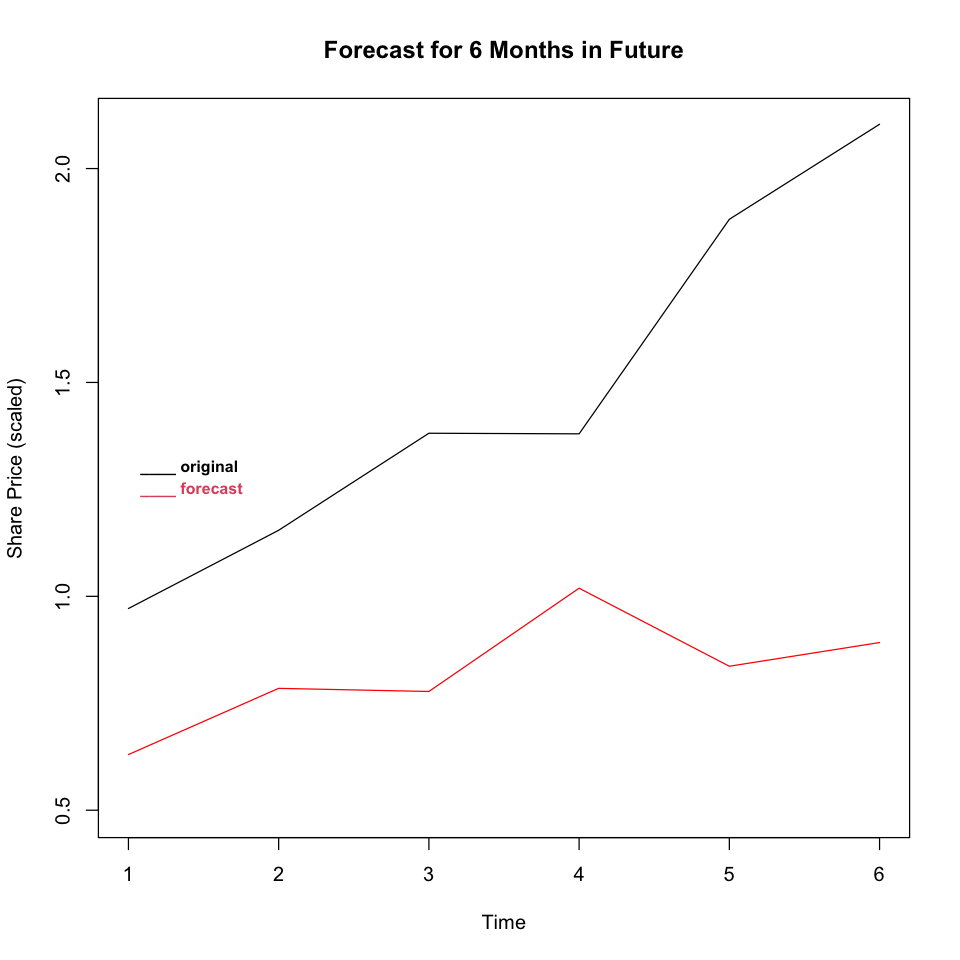

In [71]:
point_forecasts_vector <- as.numeric(fa$mean)

fa_df <- data.frame(PointForecast = as.numeric(fa$mean))

plot(ts(nvidia_test), main='Forecast for 6 Months in Future', ylab='Share Price (scaled)', ylim=c(0.5,2.1))
lines(ts(fa_df$PointForecast), col='red')
text(1, 1.3, "____ original", pos=4, cex=0.8, font=2, col=1)
text(1, 1.25, "____ forecast", pos=4, cex=0.8, font=2, col=2)

In [133]:
# data without scaling
ori_nvidia <- ts(nvidia_f$Share_Price[37:length(nvidia_f$Share_Price)])

# Scaling parameters
ratio <- (nvidia_f$Share_Price[length(nvidia_f$Share_Price)])/nvidia_test[6]

# invert the prediction back to the origional unit
ori_pred <- ts(fa_df$PointForecast) *ratio

In [135]:
ratio

[1] 201.0986

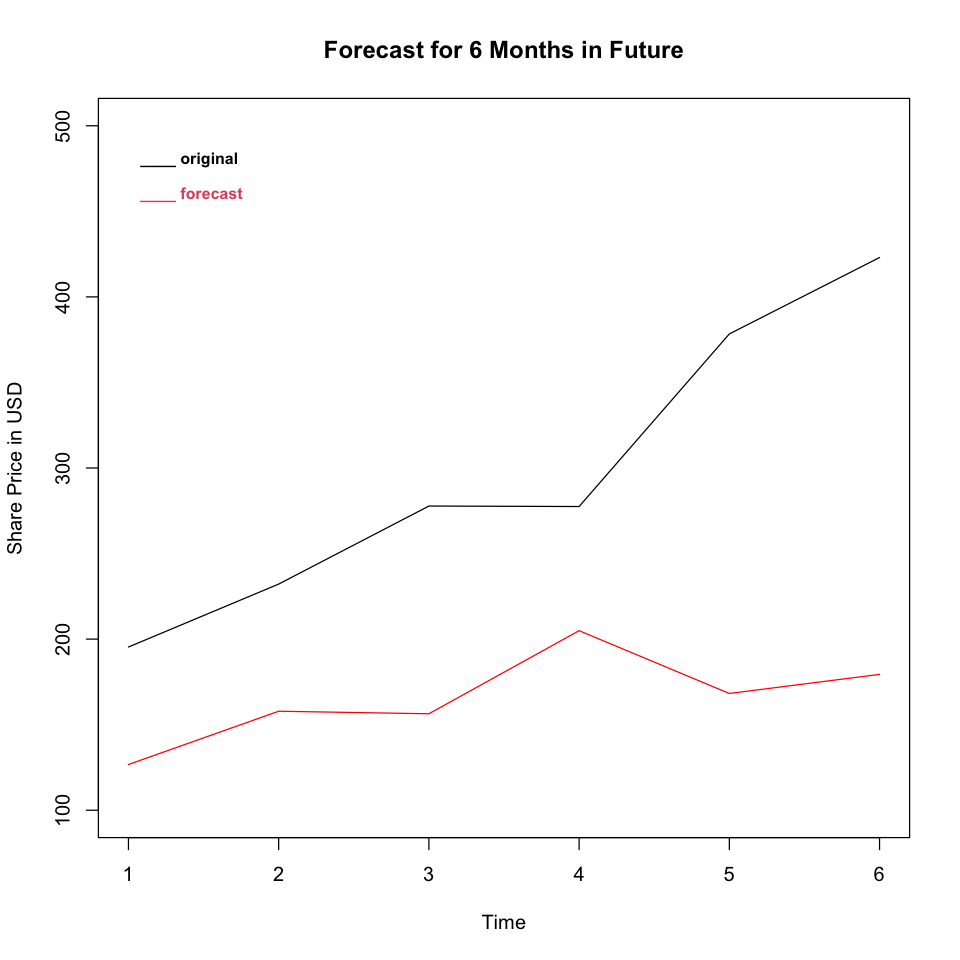

In [139]:
plot(ori_nvidia, main='Forecast for 6 Months in Future', ylab='Share Price in USD', ylim=c(100,500))
lines(ori_pred, col='red')
text(1, 480, "____ original", pos=4, cex=0.8, font=2, col=1)
text(1, 460, "____ forecast", pos=4, cex=0.8, font=2, col=2)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = 11.188, df = 6, p-value = 0.08274

Model df: 1.   Total lags used: 7



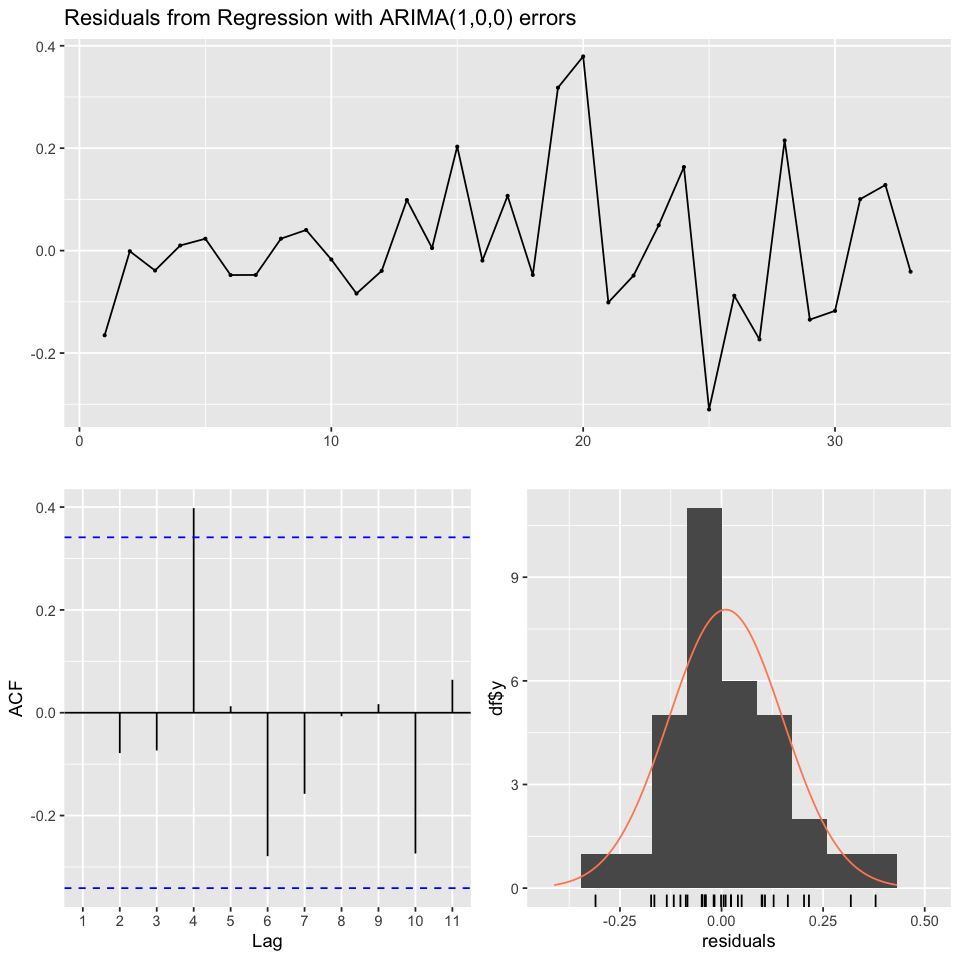

In [67]:
checkresiduals(aa)

# ARIMA

In [68]:
# ARIMA model 2: (1,1,4)
arima1 <- Arima(nvidia_train, order=c(1,1,4))

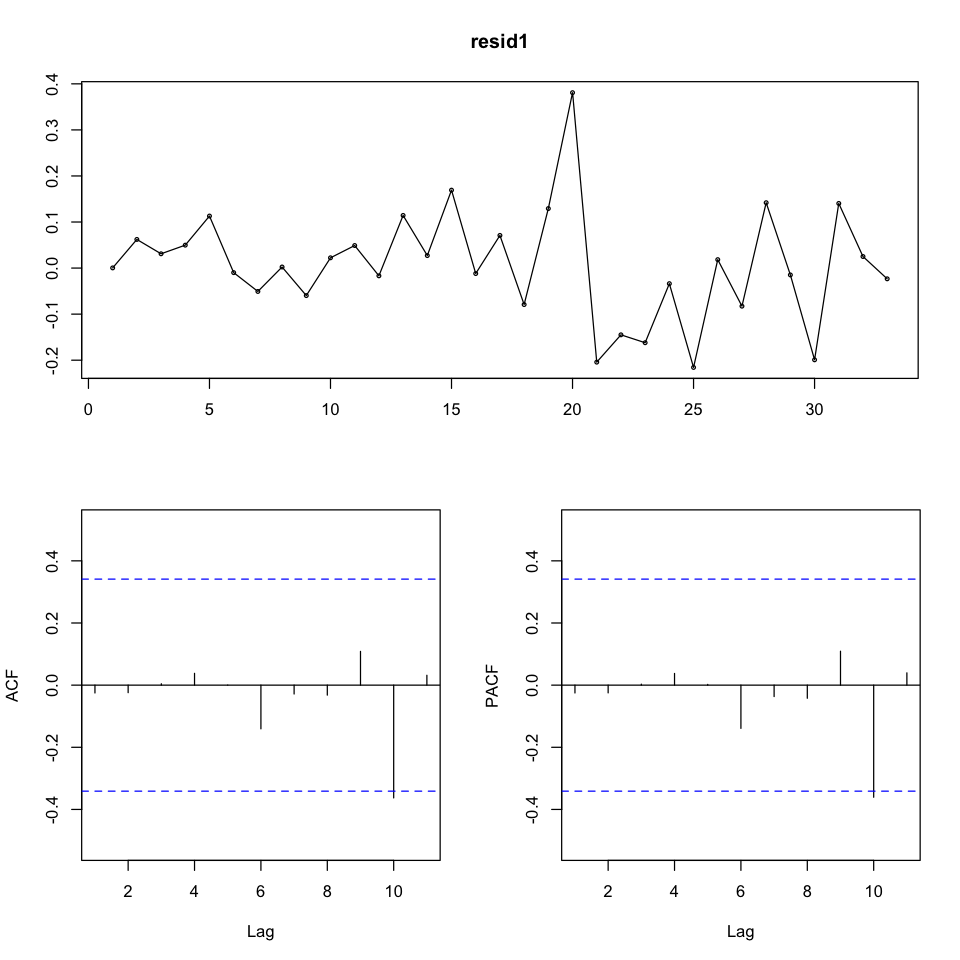

In [69]:
resid1 <- residuals(arima1)
tsdisplay(resid1)

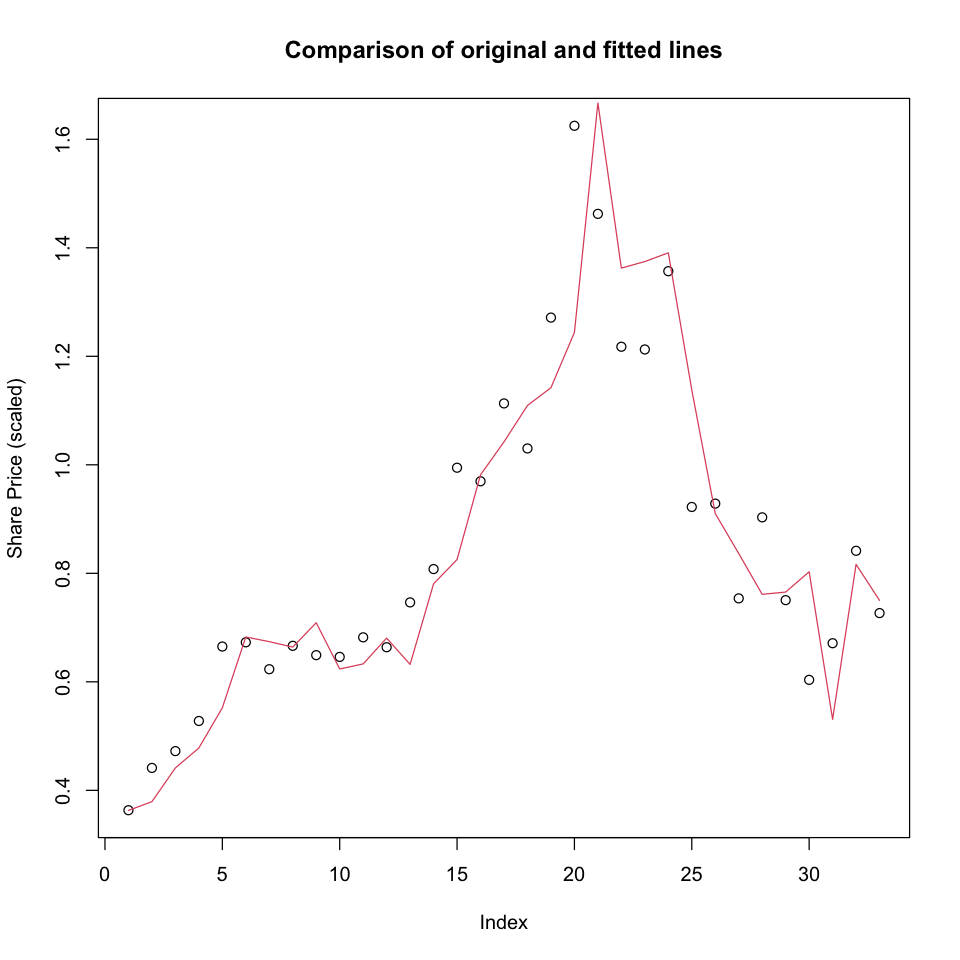

In [76]:
plot(nvidia_train, main='Comparison of original and fitted lines', ylab='Share Price (scaled)')
lines(fitted(arima1), col=2)
text(3, 1.8, "____ original", pos=4, cex=0.8, font=2, col=1)
text(3, 1.7, "____ fitted", pos=4, cex=0.8, font=2, col=2)

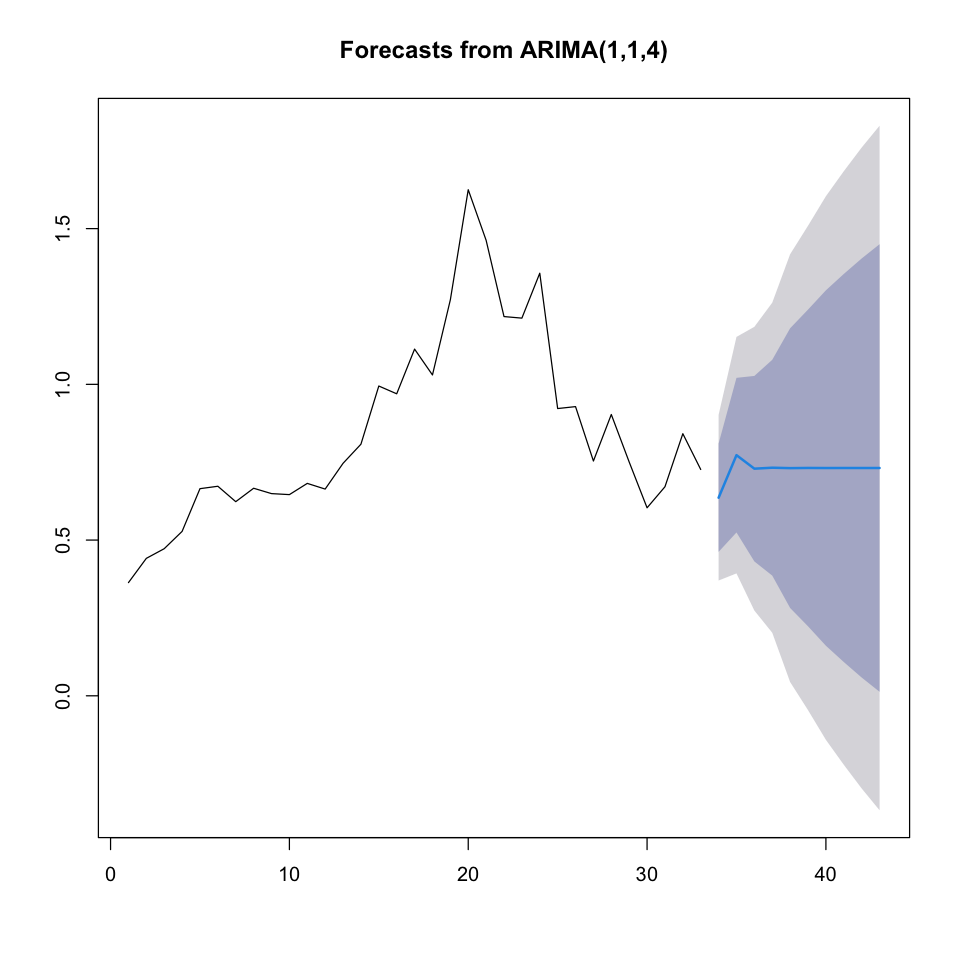

In [71]:
for1 <- forecast(arima1)
plot(for1)

In [72]:
# Arima model 2 (auto fitting)
auto.a <- auto.arima(nvidia_train)
auto.a

Series: nvidia_train 
ARIMA(0,1,0) 

sigma^2 = 0.02289:  log likelihood = 15.02
AIC=-28.05   AICc=-27.92   BIC=-26.58

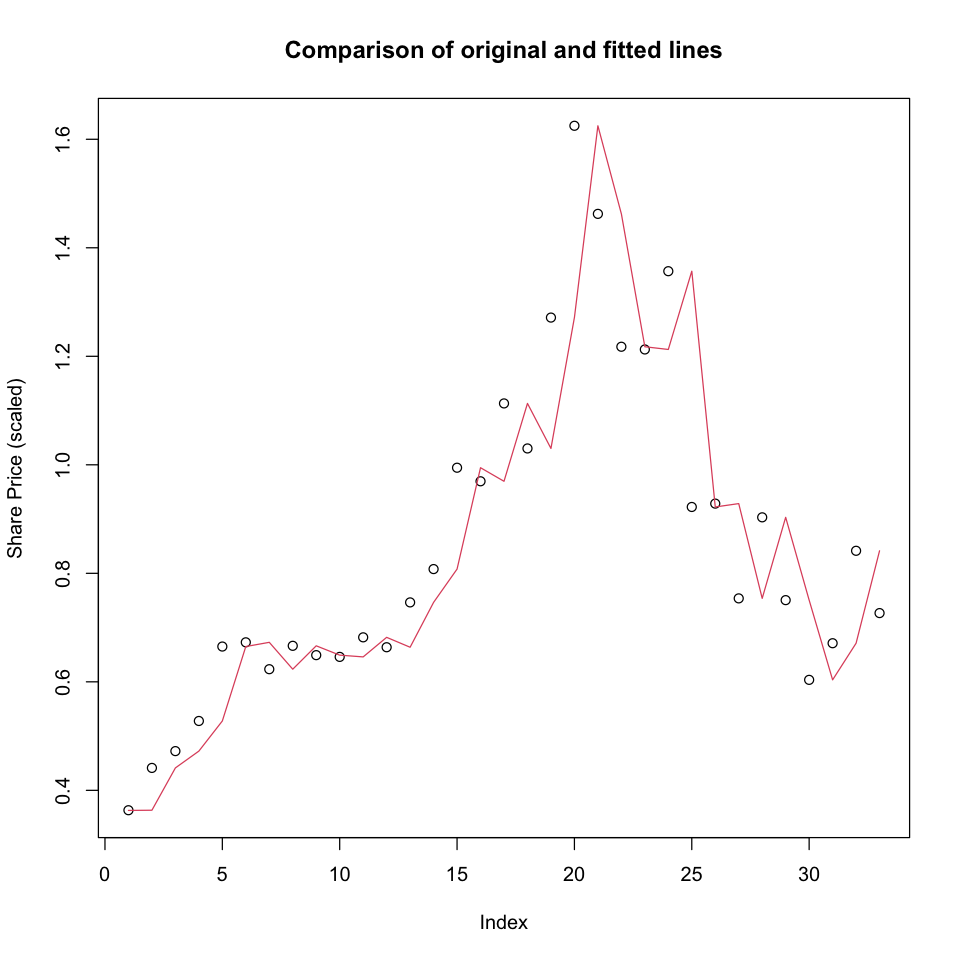

In [73]:
plot(nvidia_train, main='Comparison of original and fitted lines', ylab='Share Price (scaled)')
lines(fitted(auto.a), col=2)
text(3, 1.8, "____ original", pos=4, cex=0.8, font=2, col=1)
text(3, 1.7, "____ fitted", pos=4, cex=0.8, font=2, col=2)

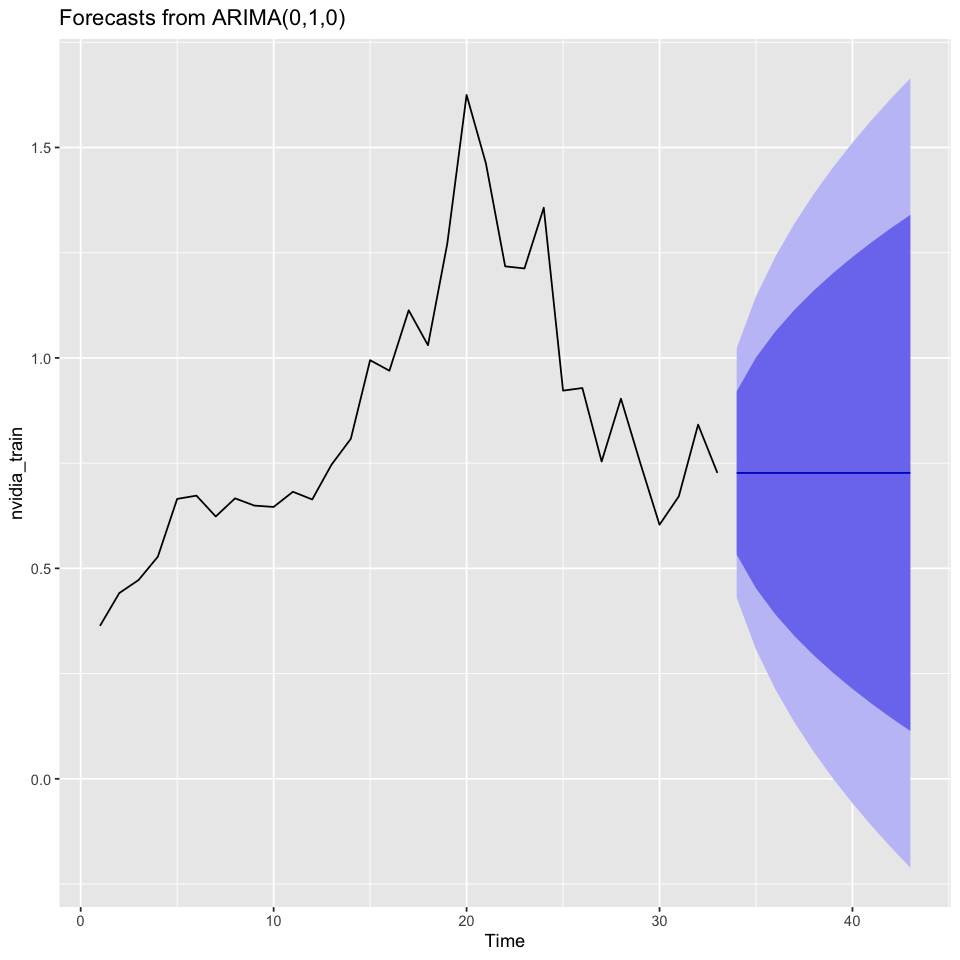

In [74]:
autoplot(forecast(auto.a))


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 8.5301, df = 7, p-value = 0.2882

Model df: 0.   Total lags used: 7



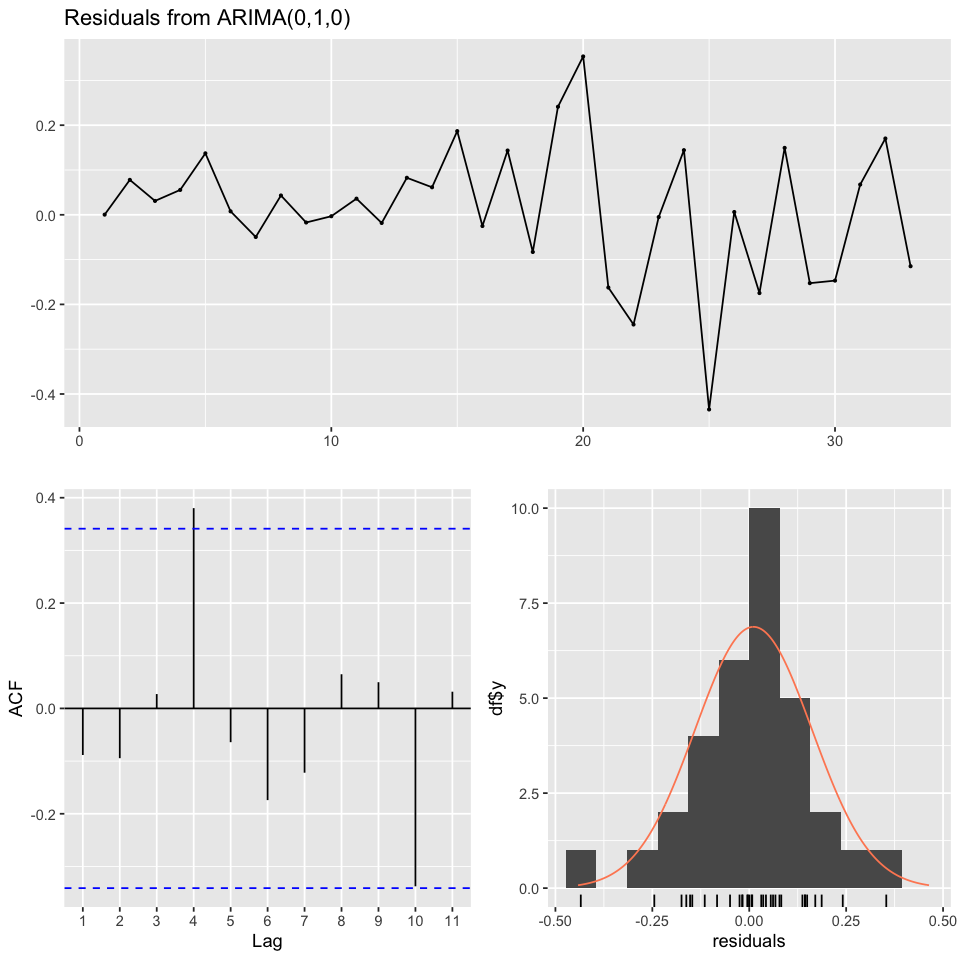

In [75]:
checkresiduals(auto.a)